<a href="https://colab.research.google.com/github/micah-shull/superstore/blob/main/005_superstore_PROFIT_Catgeory_SubCategory_LOSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import & Process Data

Dataset loaded successfully!
Missing Data:  0
Step 0: Removing outliers from column 'Sales'...

Column: Sales
Original Dataset: 9994 rows
Non-Outliers: 8827 rows (88.32%)
Outliers: 1167 rows (11.68%)


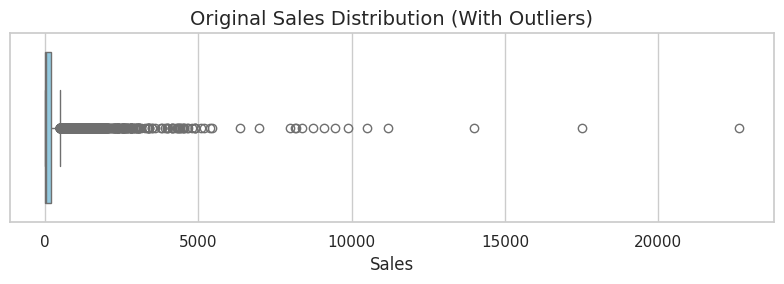

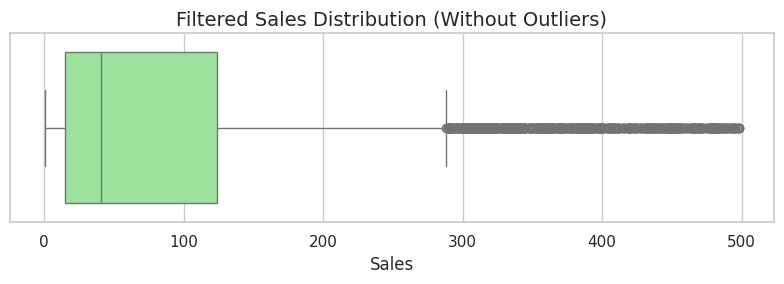

Outliers detected: 1167 rows sequestered for separate analysis.

Step 1: Preprocessing the data...
Step 2: Adding time-based columns...
Step 3: Converting to category and visualizing...



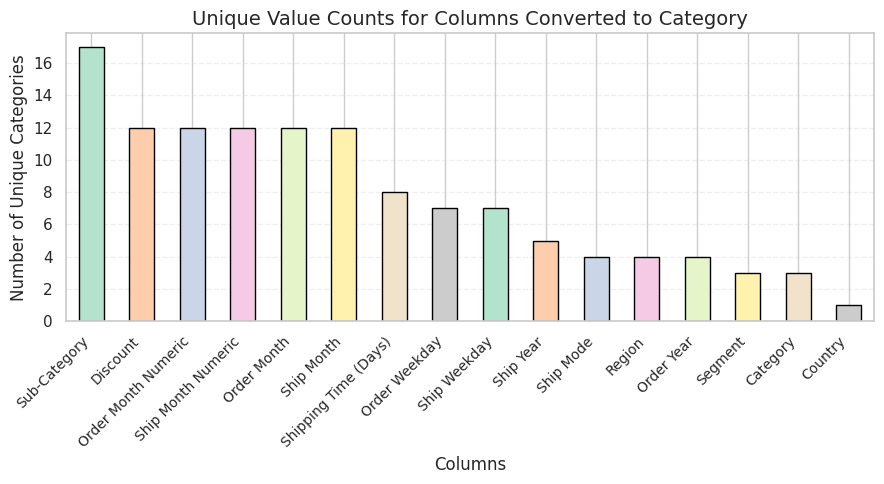


Step 4: Removing duplicates...
Removed 0 duplicate rows.
Step 5: Standardizing selected categorical columns...

Step 6: Ordering categorical columns...
Step 7: Adding abbreviated columns...
Data preparation completed!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8827 entries, 0 to 8826
Data columns (total 45 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Row ID                     8827 non-null   int64         
 1   Order ID                   8827 non-null   object        
 2   Order Date                 8827 non-null   datetime64[ns]
 3   Ship Date                  8827 non-null   datetime64[ns]
 4   Ship Mode                  8827 non-null   category      
 5   Customer ID                8827 non-null   object        
 6   Customer Name              8827 non-null   object        
 7   Segment                    8827 non-null   category      
 8   Country                    8827 non-nul

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the updated script
import importlib
import data_prep_utils as dpu
import data_visualization_utils as dvu
importlib.reload(dpu)

# Load the dataset
file_path = '/content/sample-superstore.xls'
data = pd.read_excel(file_path)

print("Dataset loaded successfully!")
print("Missing Data: ", data.isnull().sum().sum())

# Prepare the dataset
exclude_columns = ['Profit per Category', 'Profit per Sub-Category', 'Regional Market Share (%)', 'Quantity', 'Order Count']
data = dpu.prepare_data(data, outlier_column='Sales', exclude_columns=exclude_columns)

# Final check
print(data.info())

## Overall Profit Distribution Visualizations

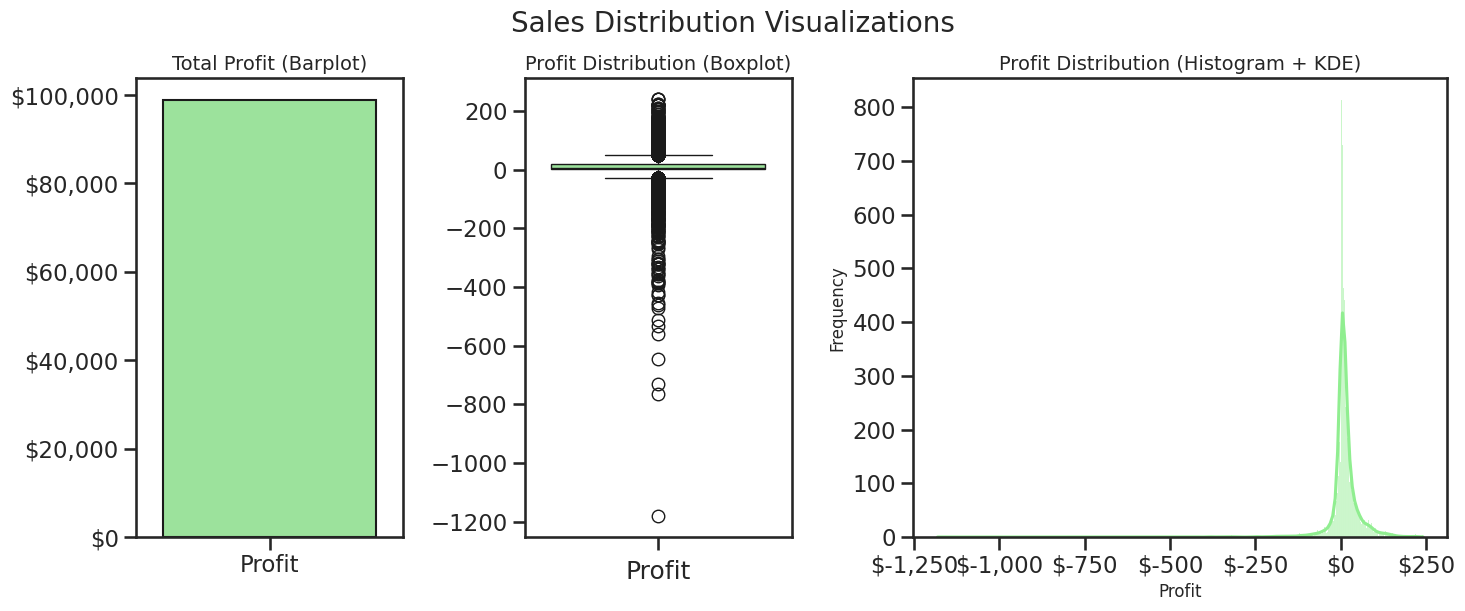

In [ ]:
# Set Seaborn theme
sns.set_theme(style="whitegrid", context="notebook")
dvu.plot_sales_distribution(data, column='Profit', title='Profit Distribution Visualizations', color='lightgreen')

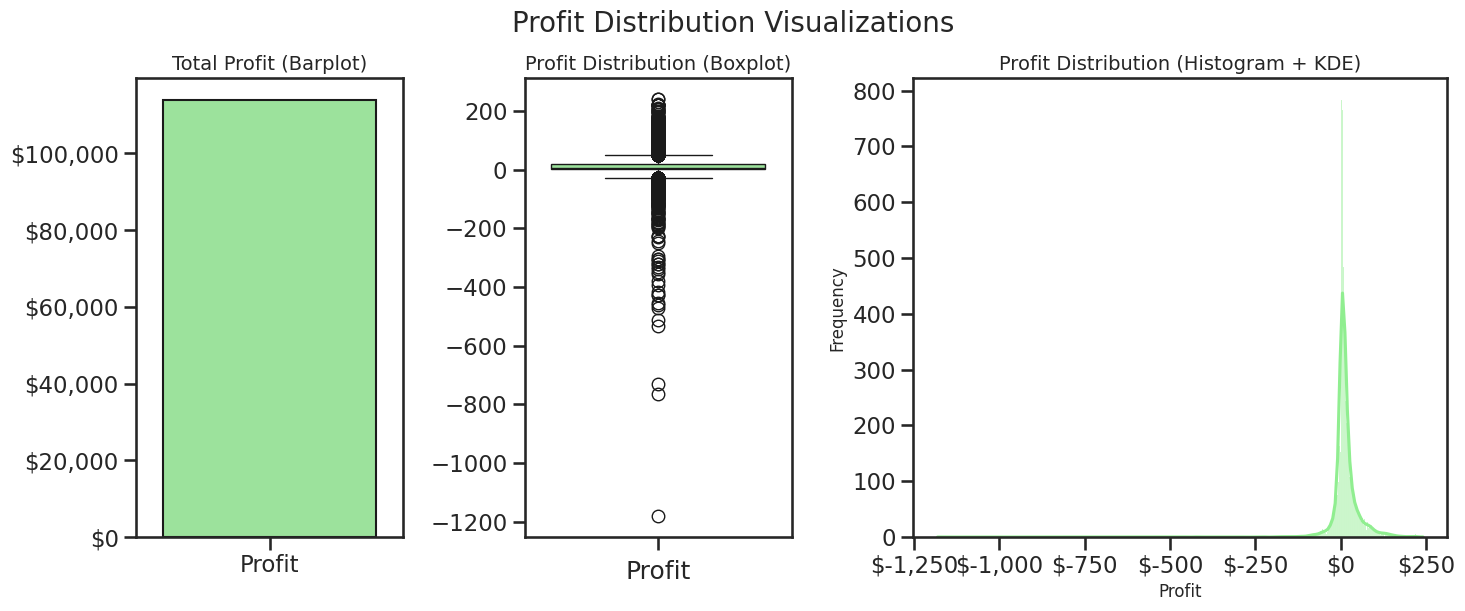

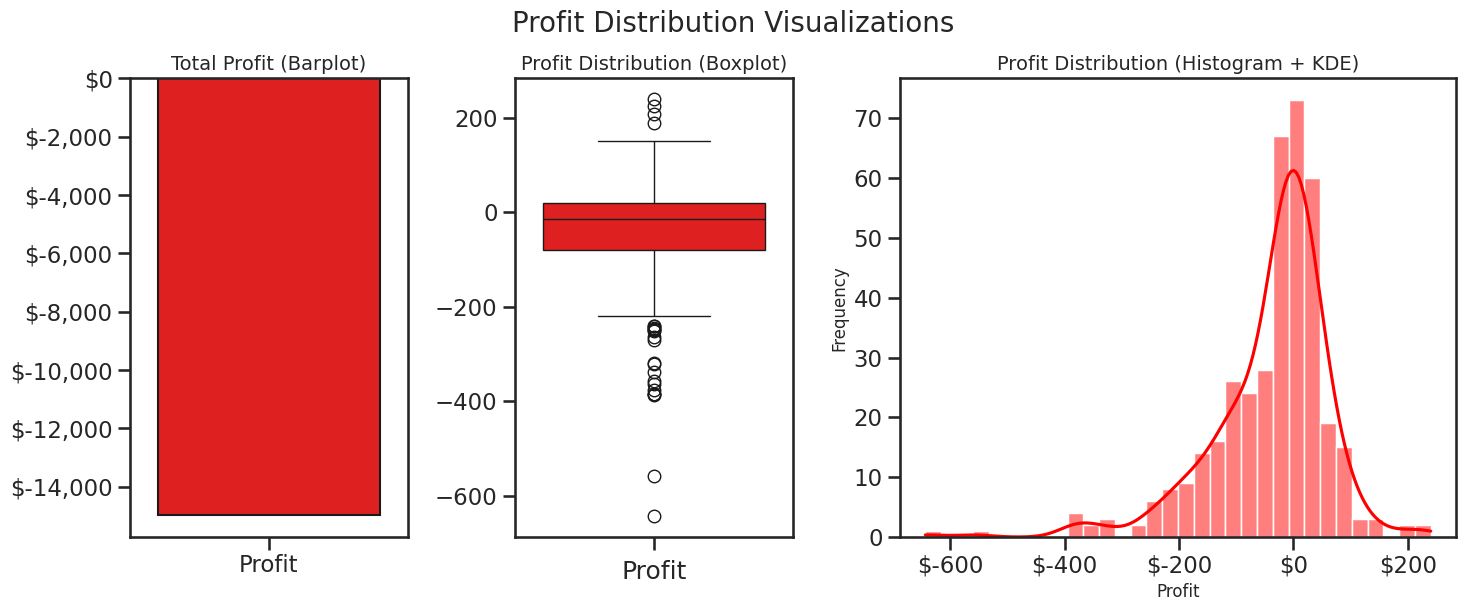

In [ ]:
# Filter data into two groups
loss_subcategories = ['Machines', 'Tables', 'Bookcases']

# Group 1: All data excluding the three loss subcategories
data_excluding_losses = data[~data['Sub-Category'].isin(loss_subcategories)]
# plot the data
dvu.plot_sales_distribution(data_excluding_losses, column='Profit', title='Profit Distribution Visualizations', color='lightgreen')

# Group 2: Data for only the three loss subcategories
data_losses_only = data[data['Sub-Category'].isin(loss_subcategories)]
# plot the data
dvu.plot_sales_distribution(data_losses_only , column='Profit', title='Profit Distribution Visualizations', color='red')




In [ ]:
# Groupby for 'Furniture' Category
furniture_df = data[data['Category'] == 'Furniture'].groupby(
    'Sub-Category', observed=True)['Profit'].sum().reset_index()
furniture_df.sort_values(by="Profit", ascending=False, inplace=True)
furniture_df['Sub-Category'] = pd.Categorical(
    furniture_df['Sub-Category'],
    categories=list(furniture_df['Sub-Category'])
)

# Groupby for 'Office Supplies' Category
office_supplies_df = data[data['Category'] == 'Office Supplies'].groupby(
    'Sub-Category', observed=True)['Profit'].sum().reset_index()
office_supplies_df.sort_values(by="Profit", ascending=False, inplace=True)
office_supplies_df['Sub-Category'] = pd.Categorical(
    office_supplies_df['Sub-Category'],
    categories=list(office_supplies_df['Sub-Category'])
)

# Groupby for 'Technology' Category
technology_df = data[data['Category'] == 'Technology'].groupby(
    'Sub-Category', observed=True)['Profit'].sum().reset_index()
technology_df.sort_values(by="Profit", ascending=False, inplace=True)
technology_df['Sub-Category'] = pd.Categorical(
    technology_df['Sub-Category'],
    categories=list(technology_df['Sub-Category'])
)

# Print .cat.categories for each DataFrame
print("Furniture Categories:")
print(furniture_df['Sub-Category'].cat.categories)
print("-" * 40)

print("Office Supplies Categories:")
print(office_supplies_df['Sub-Category'].cat.categories)
print("-" * 40)

print("Technology Categories:")
print(technology_df['Sub-Category'].cat.categories)
print("-" * 40)
print(furniture_df)
print("-" * 40)
print(office_supplies_df)
print("-" * 40)
print(technology_df)
print("-" * 40)

Furniture Categories:
Index(['Furnishings', 'Chairs', 'Bookcases', 'Tables'], dtype='object')
----------------------------------------
Office Supplies Categories:
Index(['Paper', 'Envelopes', 'Storage', 'Art', 'Labels', 'Binders',
       'Appliances', 'Fasteners', 'Supplies'],
      dtype='object')
----------------------------------------
Technology Categories:
Index(['Accessories', 'Phones', 'Copiers', 'Machines'], dtype='object')
----------------------------------------
  Sub-Category     Profit
2  Furnishings  8988.7917
1       Chairs  1626.0581
0    Bookcases -4693.1152
3       Tables -8636.2699
----------------------------------------
  Sub-Category      Profit
6        Paper  32795.3693
3    Envelopes   6760.1053
7      Storage   6735.5406
1          Art   6416.4846
5       Labels   4932.7996
2      Binders   4901.3211
0   Appliances   2028.9706
4    Fasteners    949.5182
8     Supplies    659.4286
----------------------------------------
  Sub-Category      Profit
0  Accessories

### Handling Categorical Data in Filtering

When working with **categorical data** in pandas, categories retain their original levels even after filtering unless explicitly modified. This behavior can lead to confusion or errors in downstream analyses and visualizations if not properly addressed. Below, we explain why converting to `object` and then resetting as `category` is a critical step when working with filtered categorical data.

---

#### Why Categories Retain Original Levels
In pandas, when a column is of type `category`, it includes a predefined set of categories (levels). Filtering the DataFrame does not automatically remove unused categories. For example:
```python
loss_subcategories = ['Tables', 'Bookcases', 'Machines']
filtered_data = data[data['Sub-Category'].isin(loss_subcategories)]

# Display categories
print(filtered_data['Sub-Category'].cat.categories)
```
**Output:**
```
Index(['Accessories', 'Appliances', 'Art', 'Binders', 'Bookcases', 'Chairs',
       'Copiers', 'Envelopes', 'Fasteners', 'Furnishings', 'Labels',
       'Machines', 'Paper', 'Phones', 'Storage', 'Supplies', 'Tables'],
      dtype='object')
```
Despite filtering, the column retains all original categories. This happens because pandas optimizes memory usage by reusing the existing categorical information unless explicitly instructed otherwise.

---

#### Why This Matters
Retaining unused categories can cause:
1. **Misleading Analyses**:
   - Aggregate calculations (e.g., groupby operations) may yield results for categories no longer relevant to the filtered data.
2. **Confusing Visualizations**:
   - Plots may include labels or legends for categories that do not exist in the filtered dataset.
3. **Wasted Memory**:
   - Retaining unused categories occupies memory unnecessarily.

---

#### The Fix: Converting to `object` and Resetting as `category`
By converting the column to `object` and then back to `category`, we ensure that only the relevant categories are retained:
```python
filtered_data['Sub-Category'] = filtered_data['Sub-Category'].astype('object')  # Convert to object
filtered_data['Sub-Category'] = pd.Categorical(filtered_data['Sub-Category'])  # Reset as category
```
This removes unused categories and ensures accurate representation of the filtered data.

---

#### Demonstration of the Fix
**Before Fix:**
```python
print(filtered_data['Sub-Category'].cat.categories)
```
**Output:**
```
Index(['Accessories', 'Appliances', 'Art', 'Binders', 'Bookcases', 'Chairs',
       'Copiers', 'Envelopes', 'Fasteners', 'Furnishings', 'Labels',
       'Machines', 'Paper', 'Phones', 'Storage', 'Supplies', 'Tables'],
      dtype='object')
```

**After Fix:**
```python
filtered_data['Sub-Category'] = filtered_data['Sub-Category'].astype('object')  # Convert to object
filtered_data['Sub-Category'] = pd.Categorical(filtered_data['Sub-Category'])  # Reset as category
print(filtered_data['Sub-Category'].cat.categories)
```
**Output:**
```
Index(['Bookcases', 'Machines', 'Tables'], dtype='object')
```

---

#### Importance for Notebook Documentation
Including this explanation in your notebook serves several purposes:
1. **Educational Value**:
   - Demonstrates the quirks of handling categorical data in pandas.
2. **Reproducibility**:
   - Ensures collaborators or reviewers understand why the extra step is necessary.
3. **Error Prevention**:
   - Highlights potential issues that may arise if unused categories are not removed.
4. **Best Practices**:
   - Showcases proper handling of categorical data for accurate analysis and visualization.



### How Not to Filter by Category

In [ ]:
# Filter the dataset for the specified subcategories
loss_subcategories = ['Tables', 'Bookcases', 'Machines']
filtered_data = data[data['Sub-Category'].isin(loss_subcategories)].copy()  # Create a copy to avoid the warning

# Convert 'Sub-Category' to 'object' and reset it as a category
filtered_data.loc[:, 'Sub-Category'] = filtered_data['Sub-Category'].astype('object')  # Convert to object
filtered_data.loc[:, 'Sub-Category'] = pd.Categorical(filtered_data['Sub-Category'])  # Reset as category

# Reset the 'Category' column as it now only includes the relevant categories
filtered_data.loc[:, 'Category'] = filtered_data['Category'].astype('object')  # Convert to object
filtered_data.loc[:, 'Category'] = pd.Categorical(filtered_data['Category'])  # Reset as category

# Display the updated categories for verification
print("Sub-Category categories:", filtered_data['Sub-Category'].cat.categories)
print("Category categories:", filtered_data['Category'].cat.categories)

# # Display the filtered DataFrame
# print(filtered_data.head())


Sub-Category categories: Index(['Accessories', 'Appliances', 'Art', 'Binders', 'Bookcases', 'Chairs',
       'Copiers', 'Envelopes', 'Fasteners', 'Furnishings', 'Labels',
       'Machines', 'Paper', 'Phones', 'Storage', 'Supplies', 'Tables'],
      dtype='object')
Category categories: Index(['Furniture', 'Office Supplies', 'Technology'], dtype='object')


### How to Filter by Category Correctly

In [ ]:
# Filter the dataset for the specified subcategories
loss_subcategories = ['Tables', 'Bookcases', 'Machines']
filtered_data = data[data['Sub-Category'].isin(loss_subcategories)].copy()  # Create a copy to avoid warnings

# Convert 'Sub-Category' and 'Category' to 'object' to remove original categories
filtered_data['Sub-Category'] = filtered_data['Sub-Category'].astype('object')  # Convert to object
filtered_data['Category'] = filtered_data['Category'].astype('object')  # Convert to object

# Reset 'Sub-Category' and 'Category' as 'category' with only relevant categories
filtered_data['Sub-Category'] = pd.Categorical(filtered_data['Sub-Category'])  # Reset as category
filtered_data['Category'] = pd.Categorical(filtered_data['Category'])  # Reset as category

# Display the updated categories for verification
print("Sub-Category categories:", filtered_data['Sub-Category'].cat.categories)
print("Category categories:", filtered_data['Category'].cat.categories)

# # Display the filtered DataFrame
# print(filtered_data.head())


Sub-Category categories: Index(['Bookcases', 'Machines', 'Tables'], dtype='object')
Category categories: Index(['Furniture', 'Technology'], dtype='object')


## Select Informative Columns

To explore the losses in these subcategories, the most informative columns would focus on metrics related to profitability, costs, pricing, and customer behavior. Here’s a selection of columns I recommend:

### Key Informative Columns:
1. **Profit Metrics**:
   - `Profit`: Total profit (or loss) for each transaction.
   - `Profit Margin`: The profit as a percentage of sales.
   - `Profitability Ratio`: A metric that might reflect efficiency in generating profit.

2. **Cost and Pricing Metrics**:
   - `Estimated Cost`: Helps understand the cost structure behind the losses.
   - `Effective Price`: The price after accounting for discounts, taxes, etc.

3. **Sales Metrics**:
   - `Sales`: Total revenue, useful for comparing against costs and profit.
   - `AOV (Average Order Value)`: Insight into average transaction size for each subcategory.

4. **Order and Customer Insights**:
   - `Quantity`: Number of units sold, useful to understand scale.
   - `Order Count`: Total number of orders contributing to the loss.
   - `Sales_Customer` and `Profit_Customer`: Metrics indicating how individual customers contribute to sales and profit.

5. **Discount and Shipping Impact**:
   - `Discount`: Could indicate if heavy discounting contributed to the loss.
   - `Shipping Time (Days)`: May correlate with customer satisfaction or cost overruns.

6. **Time-Based Analysis**:
   - `Order Year`, `Order Month`, `Order Weekday`: Useful for identifying seasonal trends or specific time periods with losses.


### Why These Columns Are Important:
- **Profit Metrics** provide direct insight into the losses.
- **Cost and Pricing Metrics** highlight inefficiencies in pricing or cost structures.
- **Sales and Quantity** help assess whether low revenue or high sales volume with low margins drove the losses.
- **Discounts and Shipping** might uncover operational inefficiencies or strategies contributing to losses.
- **Time-Based Data** reveals patterns and trends that may point to seasonal or temporal factors affecting profitability.

Let me know if this aligns with your objectives! 🚀

In [ ]:
# Select the most informative columns for analysis
informative_columns = [
    'Category', 'Sub-Category',
    'Profit', 'Profit Margin', 'Profitability Ratio',
    'Estimated Cost', 'Effective Price',
    'Sales', 'AOV', 'Quantity', 'Order Count',
    'Sales_Customer', 'Profit_Customer',
    'Discount', 'Shipping Time (Days)',
    'Order Year', 'Order Month', 'Order Weekday'
]

# Create a subset of the DataFrame
df = filtered_data[informative_columns].copy()

# Display the first few rows of the subset
# print(df.head())
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 388 entries, 0 to 8813
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Category              388 non-null    category
 1   Sub-Category          388 non-null    category
 2   Profit                388 non-null    float64 
 3   Profit Margin         388 non-null    float64 
 4   Profitability Ratio   388 non-null    float64 
 5   Estimated Cost        388 non-null    float64 
 6   Effective Price       388 non-null    float64 
 7   Sales                 388 non-null    float64 
 8   AOV                   388 non-null    float64 
 9   Quantity              388 non-null    int64   
 10  Order Count           388 non-null    int64   
 11  Sales_Customer        388 non-null    float64 
 12  Profit_Customer       388 non-null    float64 
 13  Discount              388 non-null    category
 14  Shipping Time (Days)  388 non-null    category
 15  Order Year

In [ ]:
df.select_dtypes(include='number').columns

Index(['Profit', 'Profit Margin', 'Profitability Ratio', 'Estimated Cost',
       'Effective Price', 'Sales', 'AOV', 'Quantity', 'Order Count',
       'Sales_Customer', 'Profit_Customer'],
      dtype='object')

In [ ]:
# Ensure the relevant columns are numeric before aggregation
numeric_columns = [
    'Profit', 'Profit Margin', 'Profitability Ratio', 'Estimated Cost',
    'Effective Price', 'Sales', 'AOV', 'Quantity', 'Order Count',
    'Sales_Customer', 'Profit_Customer', 'Discount', 'Shipping Time (Days)'
]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Aggregate metrics by year and month
aggregated_table = df.groupby(['Order Year', 'Order Month'], observed=True).agg({
    'Profit': 'sum',
    'Profit Margin': 'mean',
    'Profitability Ratio': 'mean',
    'Estimated Cost': 'sum',
    'Effective Price': 'mean',
    'Sales': 'sum',
    'AOV': 'mean',
    'Quantity': 'sum',
    'Order Count': 'sum',
    'Sales_Customer': 'mean',
    'Profit_Customer': 'mean',
    'Discount': 'mean',
    'Shipping Time (Days)': 'mean'
}).reset_index()

# Sort the table by year and month for better readability
aggregated_table = aggregated_table.sort_values(by=['Order Year', 'Order Month'])
print(aggregated_table.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Order Year            47 non-null     category
 1   Order Month           47 non-null     category
 2   Profit                47 non-null     float64 
 3   Profit Margin         47 non-null     float64 
 4   Profitability Ratio   47 non-null     float64 
 5   Estimated Cost        47 non-null     float64 
 6   Effective Price       47 non-null     float64 
 7   Sales                 47 non-null     float64 
 8   AOV                   47 non-null     float64 
 9   Quantity              47 non-null     int64   
 10  Order Count           47 non-null     int64   
 11  Sales_Customer        47 non-null     float64 
 12  Profit_Customer       47 non-null     float64 
 13  Discount              47 non-null     float64 
 14  Shipping Time (Days)  47 non-null     float64 
dtypes: categ

In [ ]:
aggregated_table

Order Year Order Month     Profit  Profit Margin  Profitability Ratio  \
0        2014     January  -343.4348     -39.552288           -12.264007   
1        2014       March  -397.9994     -31.661064           -21.450890   
2        2014       April  -181.1911     -13.470472            -5.197005   
3        2014         May  -413.3081     -31.147059           -19.689797   
4        2014        June  -440.5579     -12.353221             1.906400   
5        2014        July    53.8566       4.533613             5.179517   
6        2014      August  -238.4783     -33.516234           -19.201132   
7        2014   September  -739.1711     -20.002001            -3.051020   
8        2014     October  -399.1603     -31.642857           -21.260804   
9        2014    November  -184.9354     -13.888422            -6.063974   
10       2014    December  -172.2899     -20.470588            -9.385089   
11       2015     January  -257.4936     -33.428571           -23.228670   
12       2015    February    53.2242       6.928571            11.000214   
13       2015       March   -19.1178       6.588235            12.483279   
14       2015       April  -338.0480     -16.279762            -7.045317   
15       2015         May  -111.2802     -16.428571           -14.029536   
16       2015        June  -376.6932     -78.000000           -43.820225   
17       2015        July  -258.6131     -20.220822            -2.161770   
18       2015      August  -642.9824     -25.762693           -13.302398   
19       2015   September  -129.5727      -4.127451             0.407537   
20       2015     October  -214.7166     -32.111111           -15.324065   
21       2015    November  -217.7305      -7.661343             3.009675   
22       2015    December -1134.9024     -40.672906           -18.277244   
23       2016     January  -136.5587      -3.447619             0.452780   
24       2016    February    52.7956      22.000000            28.205128   
25       2016       March -1381.3775     -50.454673           -26.096543   
26       2016       April   125.6306       5.365686             9.723116   
27       2016         May  -205.0085     -15.307540            -5.782554   
28       2016        June  -480.6573     -20.879289           -13.492143   
29       2016        July  -508.7691     -59.777778           -36.136294   
30       2016      August   -50.7492      -4.575210             1.884119   
31       2016   September  -201.1420      -3.064196             4.550458   
32       2016     October  -335.0184     -42.336601           -15.211953   
33       2016    November  -312.2400     -23.852617            -6.918188   
34       2016    December -1354.5910     -29.893744           -14.638152   
35       2017     January   182.9542       4.763889            17.504919   
36       2017    February  -407.5894      -9.440632            -3.318431   
37       2017       March    42.4417      -2.194478             1.077714   
38       2017       April    -4.2630      -4.667112            -1.644075   
39       2017         May  -503.1833     -28.110860            -8.104504   
40       2017        June  -164.0625      -4.329632             3.763646   
41       2017        July  -163.1661     -14.327381            -7.292798   
42       2017      August  -178.4438     -16.027778            -9.436037   
43       2017   September  -459.1314     -39.483409           -10.068235   
44       2017     October  -677.7014     -21.121043            -8.913433   
45       2017    November  -419.6689     -11.985377            -3.057997   
46       2017    December  -335.2126     -20.393076            -0.039187   

    Estimated Cost  Effective Price      Sales         AOV  Quantity  \
0        1686.4898       170.791042  1343.0550  213.010471        19   
1        1613.2124       196.987550  1215.2130  198.174229        11   
2        1605.7141       174.918258  1424.5230  249.886042        14   
3        1603.6441       183.937775  1190.3360  246.516361        

##Metrics by Year & Month

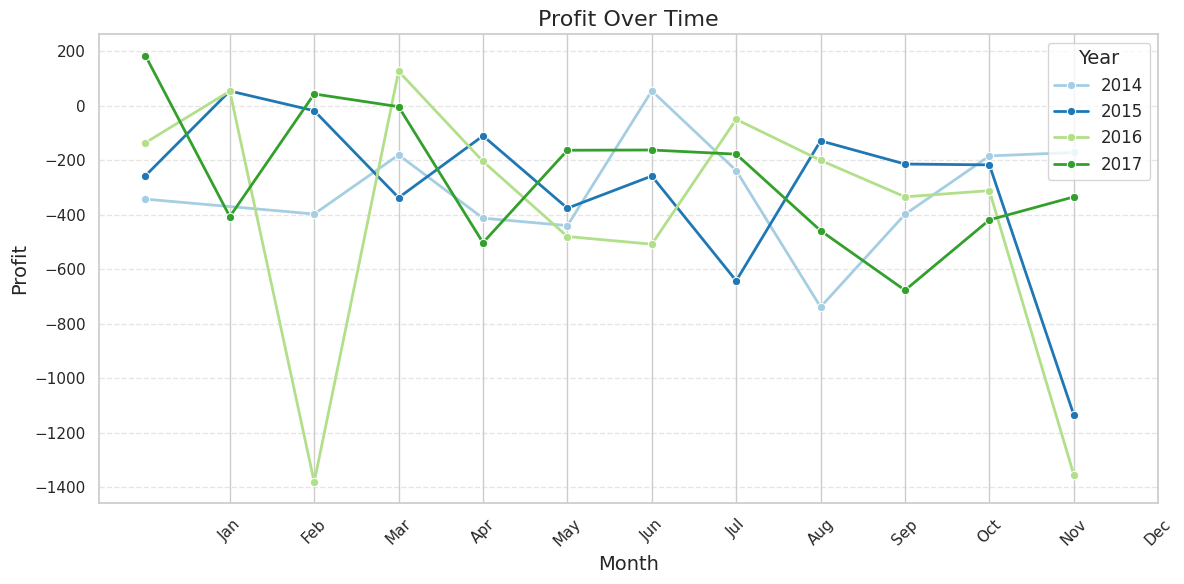

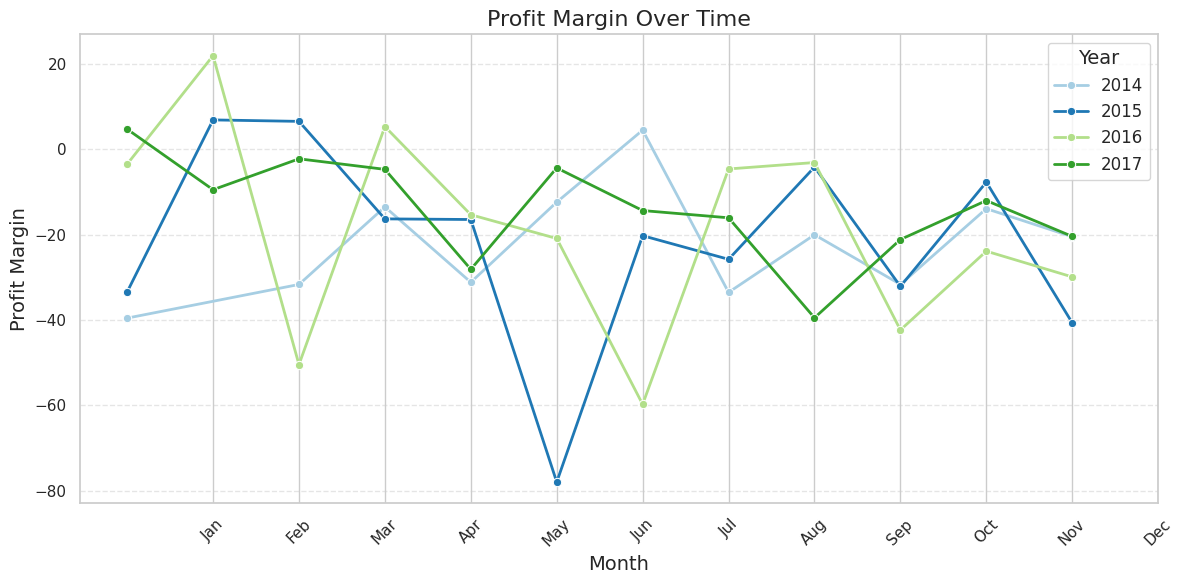

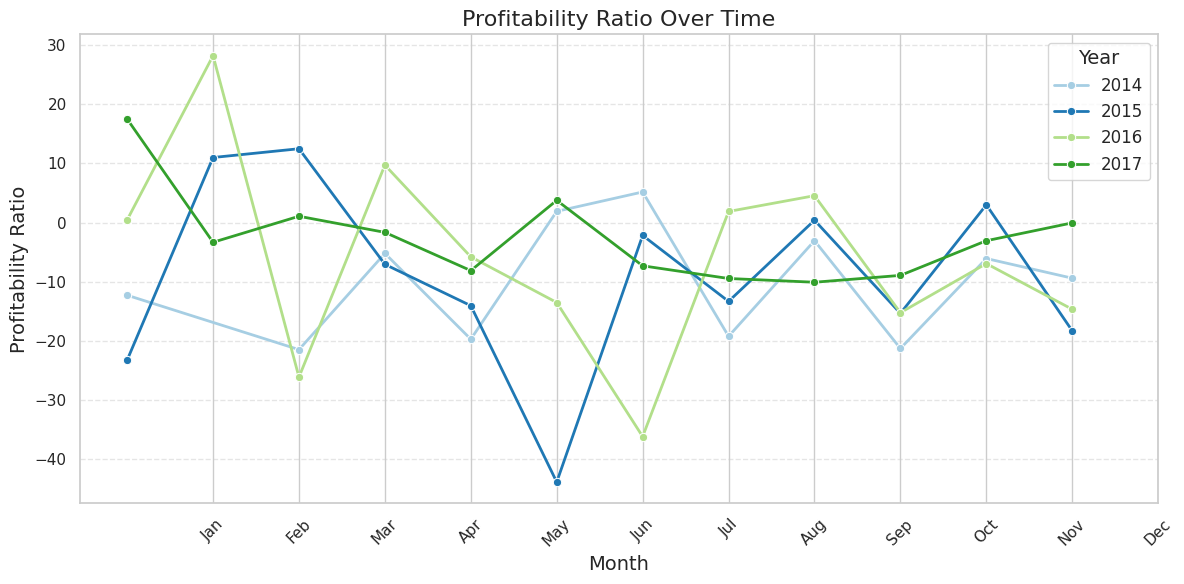

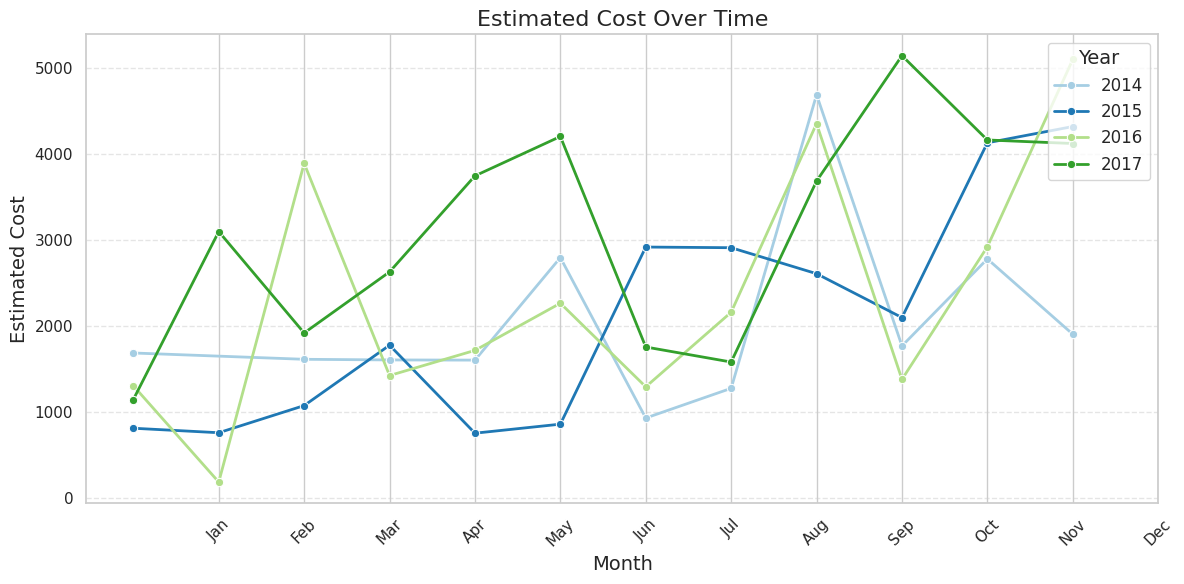

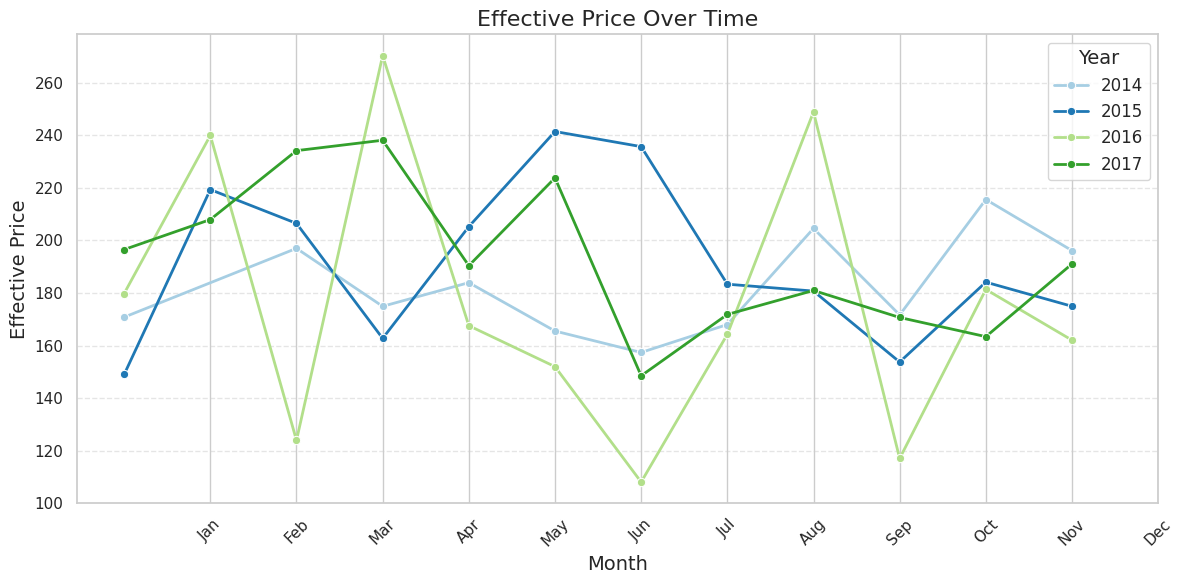

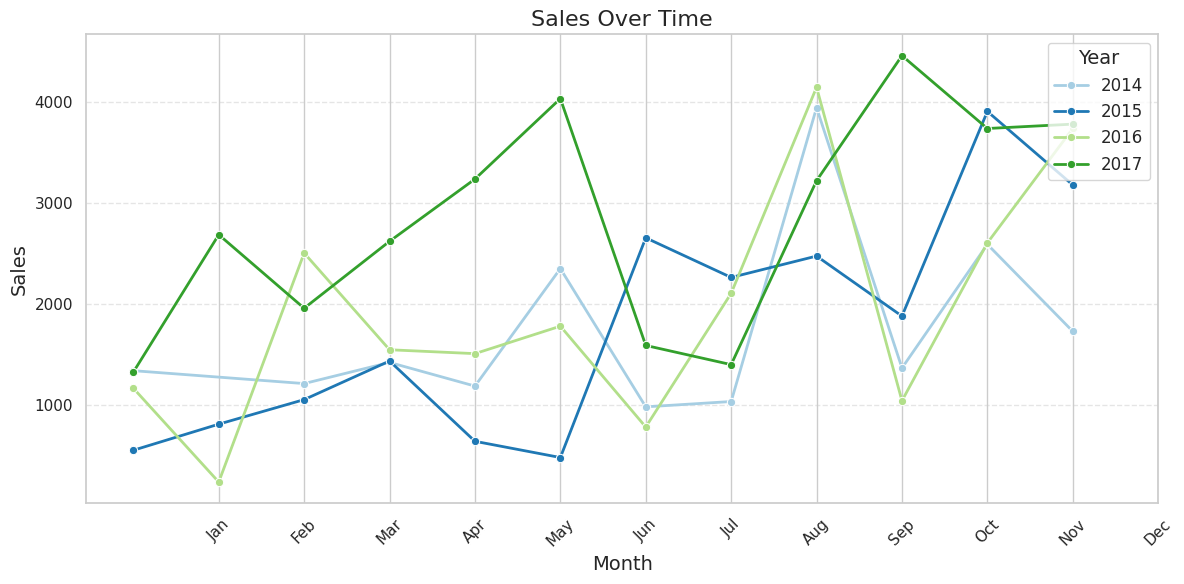

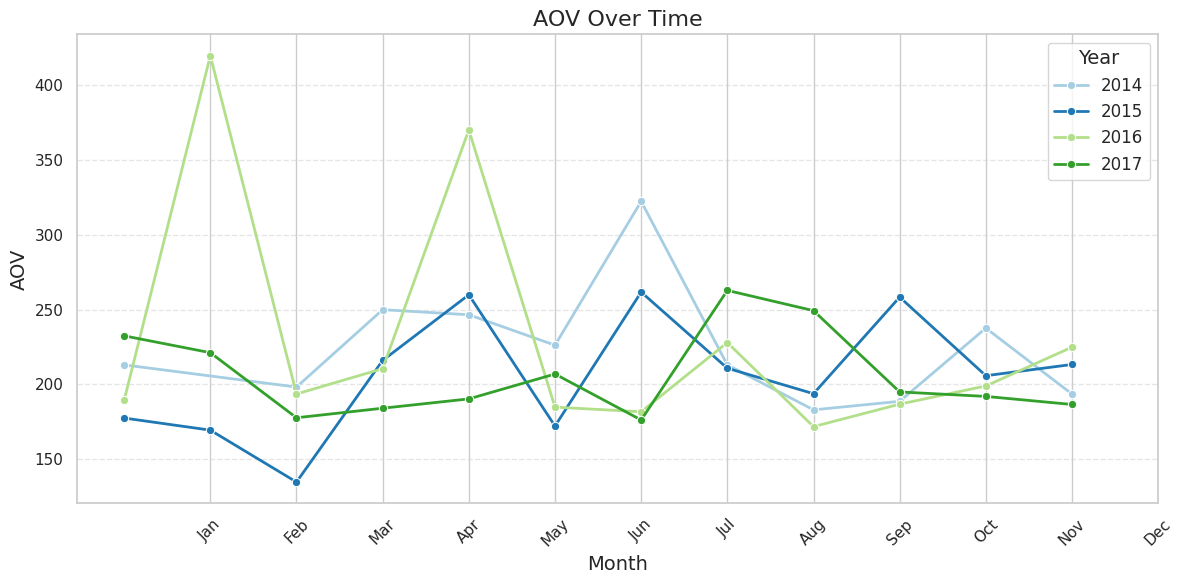

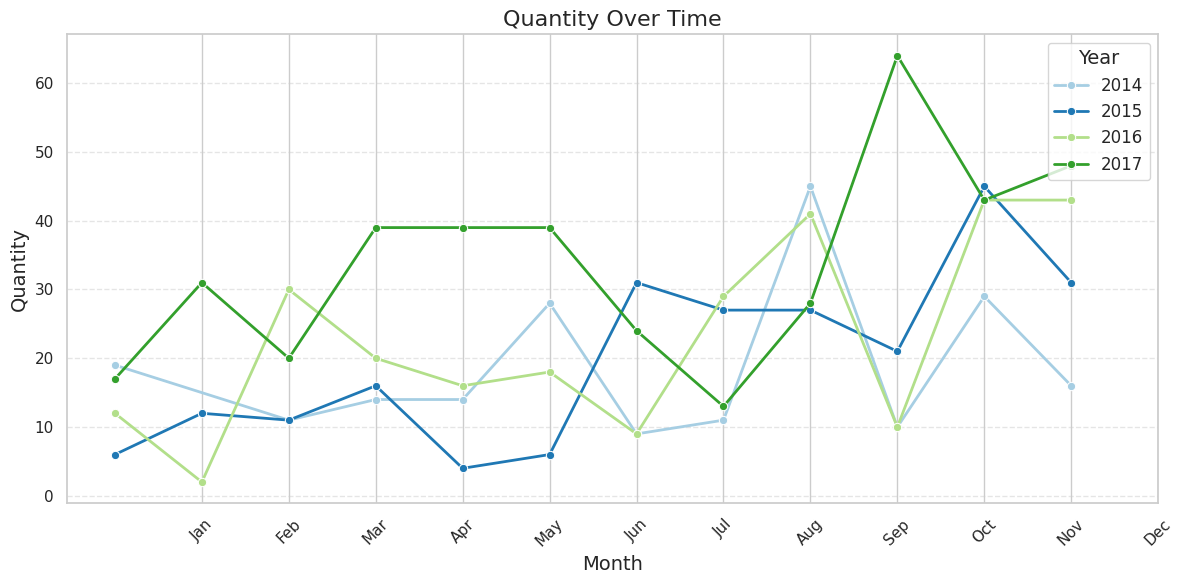

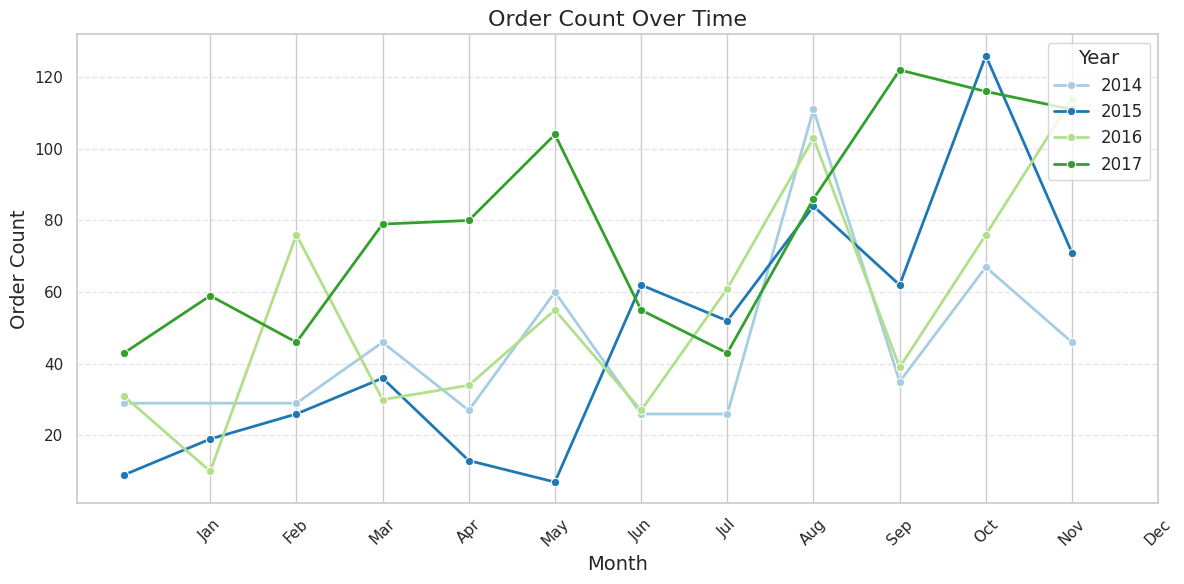

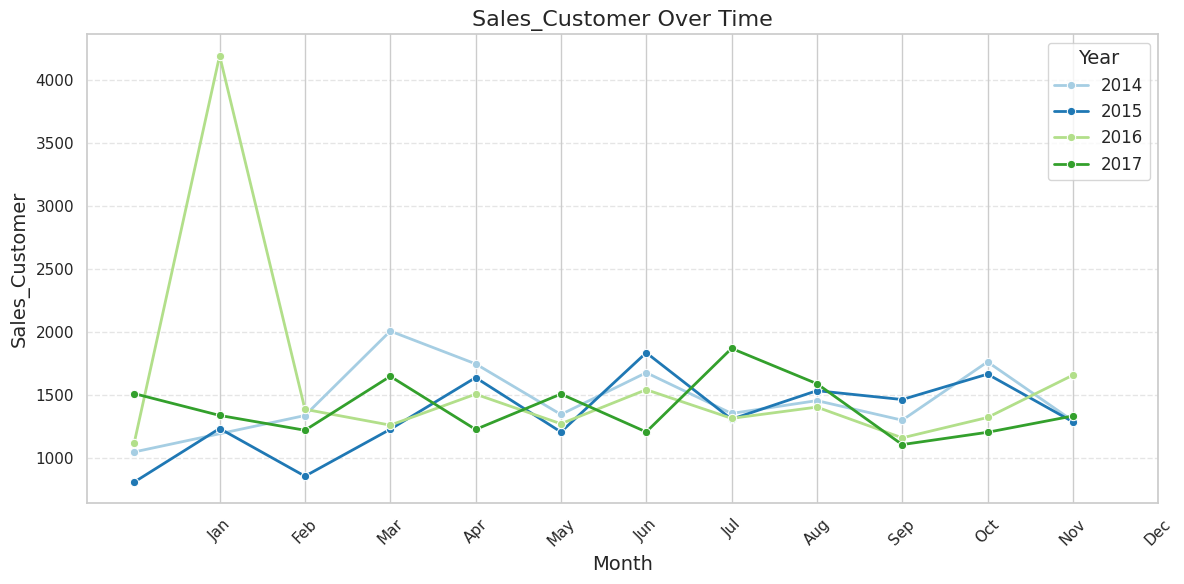

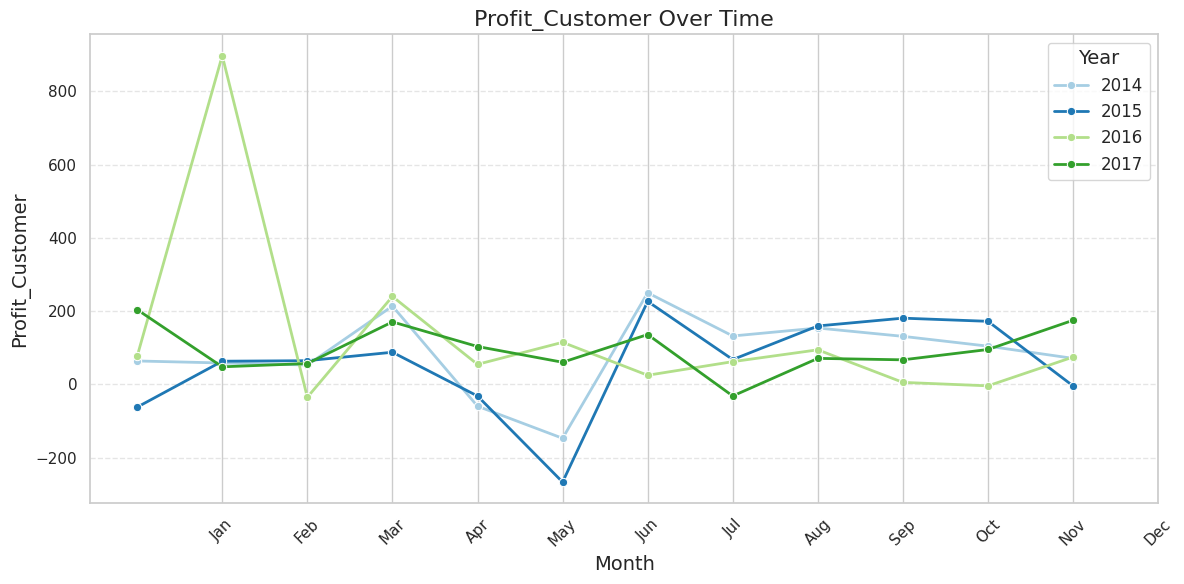

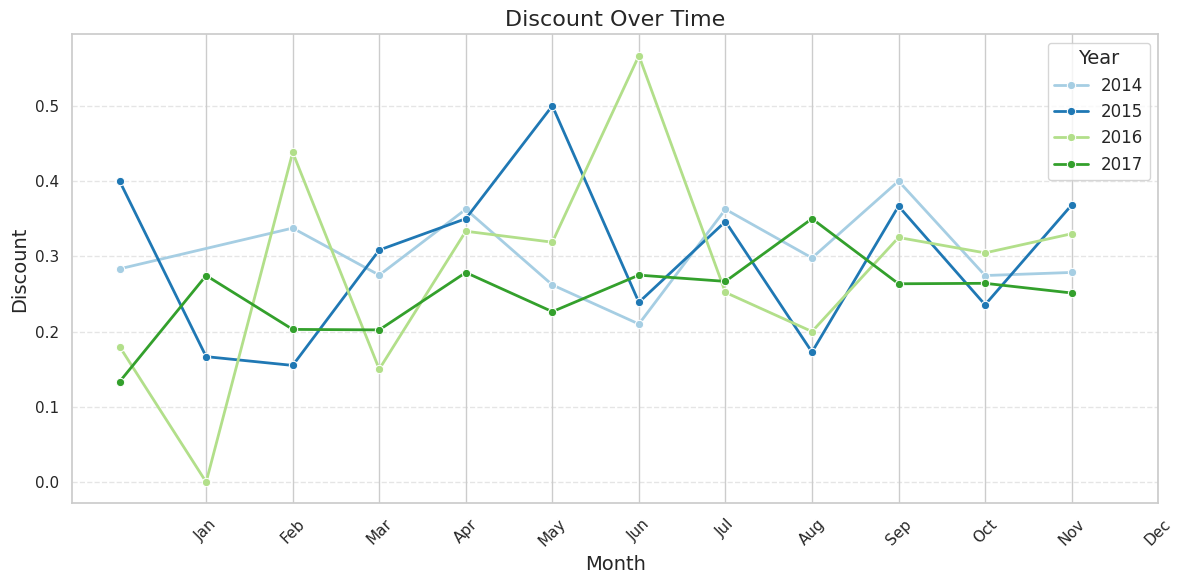

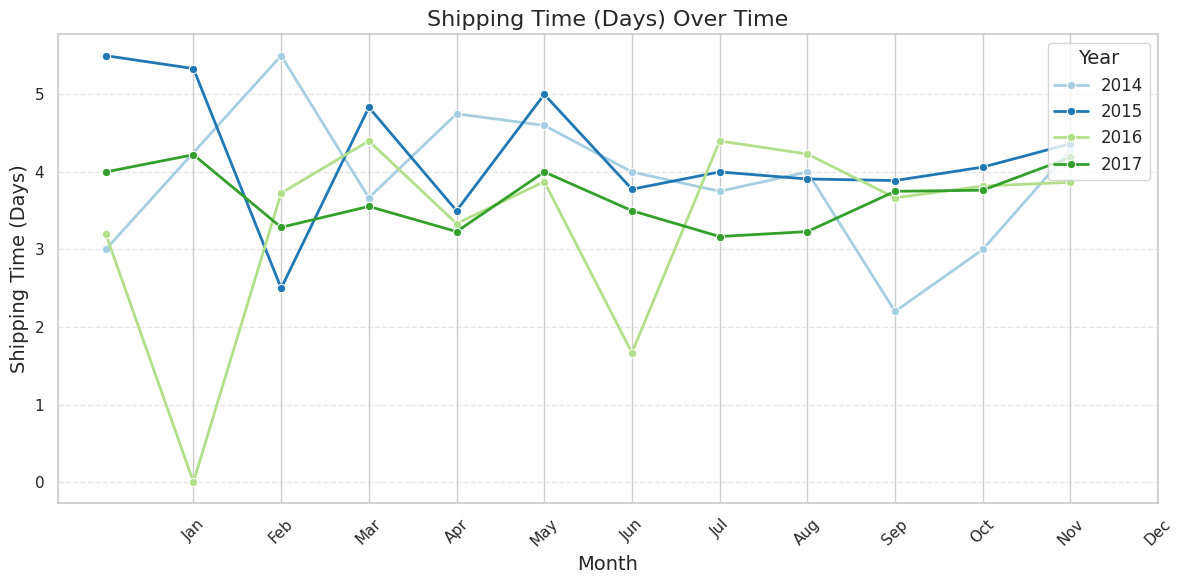

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn theme
sns.set_theme(style="whitegrid", context="notebook")

# Define the list of metrics to plot
metrics = [
    'Profit', 'Profit Margin', 'Profitability Ratio', 'Estimated Cost',
    'Effective Price', 'Sales', 'AOV', 'Quantity', 'Order Count',
    'Sales_Customer', 'Profit_Customer', 'Discount', 'Shipping Time (Days)'
]

# Iterate through each metric and create a plot
for metric in metrics:
    plt.figure(figsize=(12, 6))

    # Create lineplot
    sns.lineplot(
        data=aggregated_table,
        x='Order Month',
        y=metric,
        hue='Order Year',
        marker='o',
        palette="Paired",
        linewidth=2
    )

    # Format the plot
    plt.title(f"{metric} Over Time", fontsize=16)
    plt.xlabel("Month", fontsize=14)
    plt.ylabel(metric, fontsize=14)
    plt.xticks(ticks=range(1, 13), labels=[
        'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
    ], rotation=45)
    plt.legend(title="Year", fontsize=12, title_fontsize=14, loc="upper right")
    plt.grid(axis='y', linestyle='--', alpha=0.5)

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()




### Analyzing the Trends:

1. **Profit**:
   - Negative values are present for most months, confirming declining profits as the year progresses.
   - Profit resets at the beginning of each year.

2. **Profit Margin**:
   - Consistently negative for most months and shows a steady decline, resetting at the start of each year.

3. **Estimated Costs**:
   - Costs increase over the months (e.g., ~1,686 in January 2014 to ~4,119 in December 2017), confirming a steady rise every year.

4. **Sales**:
   - Sales also rise throughout the year (e.g., ~1,343 in January 2014 to ~3,784 in December 2017), indicating increasing revenue.

5. **AOV**:
   - AOV remains relatively flat, with no significant variation between months.

6. **Quantity and Order Count**:
   - Both metrics show an upward trend over the months, confirming increasing sales volume each year.

7. **Discount**:
   - Discounts increase throughout the year (e.g., 0.28 in January 2014 to 0.33 in December 2017), supporting the observation of a rising discount trend.

---

### Validation of Observations:
Your analysis is **accurate** based on the provided data table. The trends for each metric align with the cyclical nature you described.


### Filter Data by Metrics

In [ ]:
# Filter the aggregated table to include only the relevant metrics
metrics_to_include = [
    'Profit', 'Profit Margin', 'Profitability Ratio',
    'Estimated Cost', 'Sales', 'AOV', 'Quantity',
    'Order Count', 'Discount'
]

# Filter the table
metrics_df = df[['Category', 'Sub-Category', 'Order Year', 'Order Month'] + metrics_to_include]
metrics_df

Category Sub-Category Order Year Order Month    Profit  Profit Margin  \
0      Furniture    Bookcases       2016    November   41.9136      16.000000   
176    Furniture       Tables       2014      August -161.8750     -74.000000   
188    Furniture    Bookcases       2015     January -244.3230     -54.000000   
197   Technology     Machines       2015    December -383.9904     -80.000000   
204    Furniture       Tables       2017       April -102.0480     -43.636364   
...          ...          ...        ...         ...       ...            ...   
8741   Furniture       Tables       2014       March -143.2548     -43.333333   
8774   Furniture       Tables       2016        June   -1.7772      -2.500000   
8789   Furniture       Tables       2015    December   10.2588       3.750000   
8796   Furniture    Bookcases       2015       March  -67.6704     -17.647059   
8813   Furniture       Tables       2015   September   22.3548      26.000000   

      Profitability Ratio  Estimated Cost     Sales         AOV  Quantity  \
0               19.047619        220.0464  261.9600  138.946667         2   
176            -42.528736        380.6250  218.7500  297.097667         2   
188            -35.064935        696.7730  452.4500  180.663143         5   
197            -44.444444        863.9784  479.9880  300.184000         4   
204            -30.379747        335.9080  233.8600  208.660000         2   
...                   ...             ...       ...         ...       ...   
8741           -30.232558        473.8428  330.5880  194.699444         1   
8774            -2.439024         72.8652   71.0880   88.823750         2   
8789             3.896104        263.3092  273.5680  241.828240         2   
8796           -15.000000        451.1360  383.4656  154.974900         4   
8813            35.135135         63.6252   85.9800  140.478400         1   

      Order Count  Discount  
0               3      0.00  
176             6      0.50  
188             7      0.50  
197             3      0.70  
204             8      0.45  
...           ...       ...  
8741            9      0.40  
8774            8      0.20  
8789            5      0.20  
8796            4      0.32  
8813            5      0.00  

[388 rows x 13 columns]

In [ ]:
metrics_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 388 entries, 0 to 8813
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Category             388 non-null    category
 1   Sub-Category         388 non-null    category
 2   Order Year           388 non-null    category
 3   Order Month          388 non-null    category
 4   Profit               388 non-null    float64 
 5   Profit Margin        388 non-null    float64 
 6   Profitability Ratio  388 non-null    float64 
 7   Estimated Cost       388 non-null    float64 
 8   Sales                388 non-null    float64 
 9   AOV                  388 non-null    float64 
 10  Quantity             388 non-null    int64   
 11  Order Count          388 non-null    int64   
 12  Discount             388 non-null    float64 
dtypes: category(4), float64(7), int64(2)
memory usage: 32.6 KB


In [ ]:
print(metrics_df['Category'].cat.categories)
print(metrics_df['Sub-Category'].cat.categories)
print(metrics_df['Order Year'].cat.categories)

Index(['Furniture', 'Technology'], dtype='object')
Index(['Bookcases', 'Machines', 'Tables'], dtype='object')
Index([2014, 2015, 2016, 2017], dtype='int32')


## Profit by Category

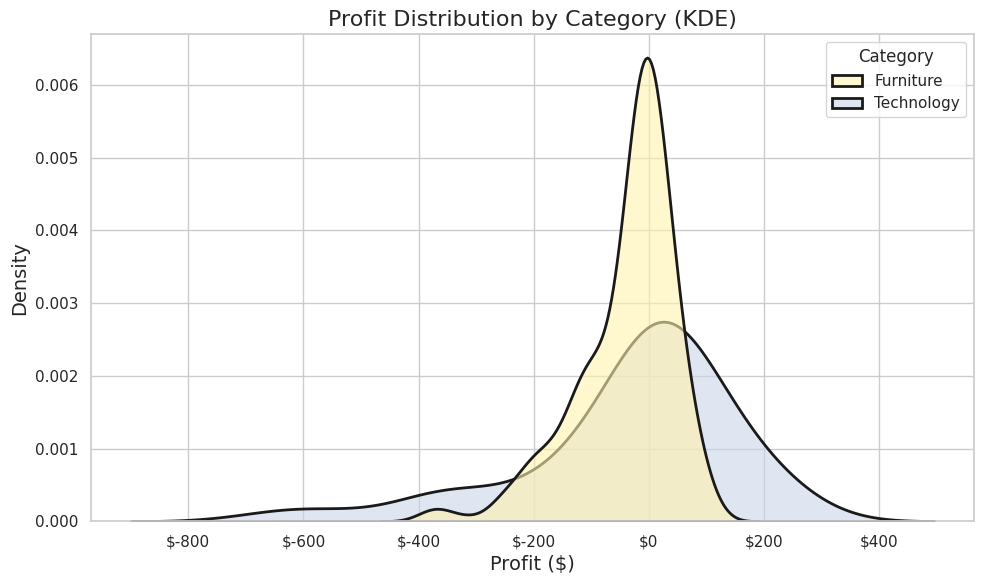

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn theme
sns.set_theme(style="whitegrid", context="notebook")
palette = "Pastel2_r"

# Create the KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=metrics_df,
    x="Profit",
    hue="Category",
    palette=palette,
    fill=True,
    common_norm=False,  # Avoid normalizing across categories
    alpha=0.6,  # Transparency for better overlap visibility
    linewidth=2, edgecolor='k'
)

# Add labels and title
plt.title("Profit Distribution by Category (KDE)", fontsize=16)
plt.xlabel("Profit ($)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

# Adjust layout
plt.tight_layout()
plt.show()


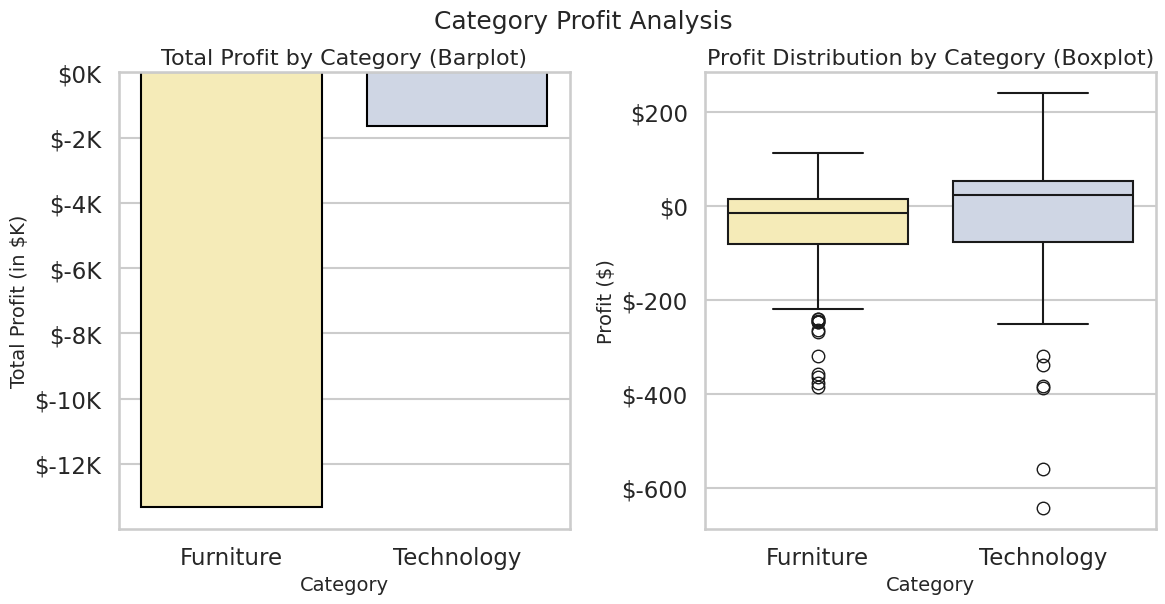

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up Seaborn theme
sns.set_theme(style="whitegrid", context="talk")
palette = "Pastel2_r"

# Step 1: Aggregate profits by category
category_profits = metrics_df.groupby('Category', observed=True)['Profit'].sum()

# Step 2: Convert profits to thousands for readability
category_profits_k = category_profits / 1000

# Step 3: Create a 1x2 grid for visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Total Profit by Category (Barplot)
sns.barplot(
    x=category_profits_k.index,
    y=category_profits_k.values,
    hue=category_profits_k.index,
    palette=palette,
    edgecolor="black",
    ax=axes[0],
    dodge=False
)
axes[0].set_title("Total Profit by Category (Barplot)", fontsize=16)
axes[0].set_xlabel("Category", fontsize=14)
axes[0].set_ylabel("Total Profit (in $K)", fontsize=14)
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}K"))
# axes[0].legend_.remove()  # Remove redundant legend

# Plot 2: Profit Distribution by Category (Boxplot)
sns.boxplot(
    data=metrics_df,
    x="Category",
    y="Profit",
    hue="Category",
    palette=palette,
    linewidth=1.5, linecolor='k',
    ax=axes[1]
)
axes[1].set_title("Profit Distribution by Category (Boxplot)", fontsize=16)
axes[1].set_xlabel("Category", fontsize=14)
axes[1].set_ylabel("Profit ($)", fontsize=14)
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))
# axes[1].legend_.remove()  # Remove redundant legend

# Adjust layout
plt.tight_layout()
plt.suptitle("Category Profit Analysis", fontsize=18, y=1.02)
plt.show()


## Profit by Sub-Category

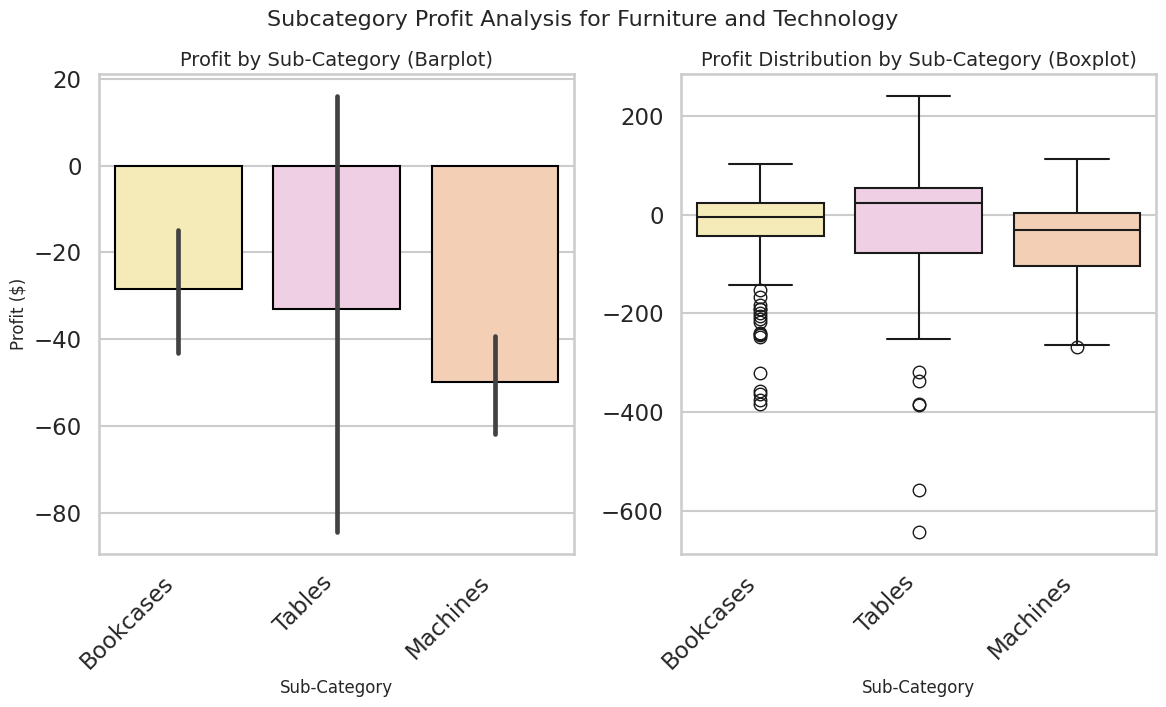

In [ ]:
# Set Seaborn theme
sns.set_theme(style="whitegrid", context="talk")
palette = "Pastel2_r"

# Filter metrics_df for Furniture and Technology categories
filtered_df = metrics_df[metrics_df['Category'].isin(['Furniture', 'Technology'])]

# Create a 1x2 grid for the barplot and boxplot
fig, axes = plt.subplots(1, 2, figsize=(12, 7), sharey=False)

# Plot 1: Barplot of Profit by Sub-Category
sns.barplot(
    data=filtered_df,
    x="Sub-Category",
    y="Profit",
    hue="Sub-Category",
    palette=palette, legend=False,
    edgecolor="black",
    ax=axes[0]
)
axes[0].set_title("Profit by Sub-Category (Barplot)", fontsize=14)
axes[0].set_xlabel("Sub-Category", fontsize=12)
axes[0].set_ylabel("Profit ($)", fontsize=12)
# axes[0].legend(title="Category", fontsize=10, title_fontsize=12)

# Fix x-ticks for the barplot
axes[0].set_xticks(range(len(filtered_df['Sub-Category'].unique())))
axes[0].set_xticklabels(filtered_df['Sub-Category'].unique(), rotation=45, ha="right")

# Plot 2: Boxplot of Profit by Sub-Category
sns.boxplot(
    data=filtered_df,
    x="Sub-Category",
    y="Profit",
    hue="Sub-Category",
    palette=palette, legend=False,
    linewidth=1.5,linecolor='k',
    ax=axes[1]
)
axes[1].set_title("Profit Distribution by Sub-Category (Boxplot)", fontsize=14)
axes[1].set_xlabel("Sub-Category", fontsize=12)
axes[1].set_ylabel("")  # Remove duplicate ylabel
# axes[1].legend(title="Category", fontsize=10, title_fontsize=12)

# Fix x-ticks for the boxplot
axes[1].set_xticks(range(len(filtered_df['Sub-Category'].unique())))
axes[1].set_xticklabels(filtered_df['Sub-Category'].unique(), rotation=45, ha="right")

# Adjust layout and add a super title
plt.tight_layout()
fig.suptitle("Subcategory Profit Analysis for Furniture and Technology", fontsize=16, y=1.02)

# Show the plot
plt.show()


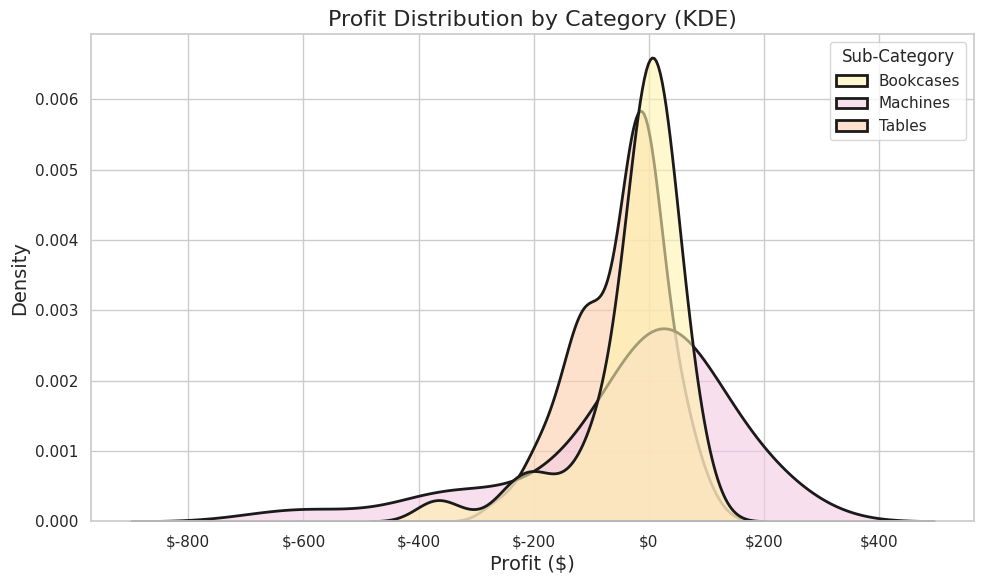

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn theme
sns.set_theme(style="whitegrid", context="notebook")
palette = "Pastel2_r"

# Create the KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=metrics_df,
    x="Profit",
    hue="Sub-Category",
    palette=palette,
    fill=True,
    common_norm=False,  # Avoid normalizing across categories
    alpha=0.6,  # Transparency for better overlap visibility
    linewidth=2, edgecolor='k'
)

# Add labels and title
plt.title("Profit Distribution by Category (KDE)", fontsize=16)
plt.xlabel("Profit ($)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

# Adjust layout
plt.tight_layout()
plt.show()

## Descriptive Statistics

In [ ]:
metrics_df.groupby('Category', observed=True)['Profit'].agg(['sum', 'mean', 'median', 'max', 'min']).reset_index()

Category         sum       mean   median      max       min
0   Furniture -13329.3851 -39.436051 -15.5295  111.774 -384.7164
1  Technology  -1649.9229 -32.998458  23.3877  239.985 -643.7100

## Descriptive Statistics by Category

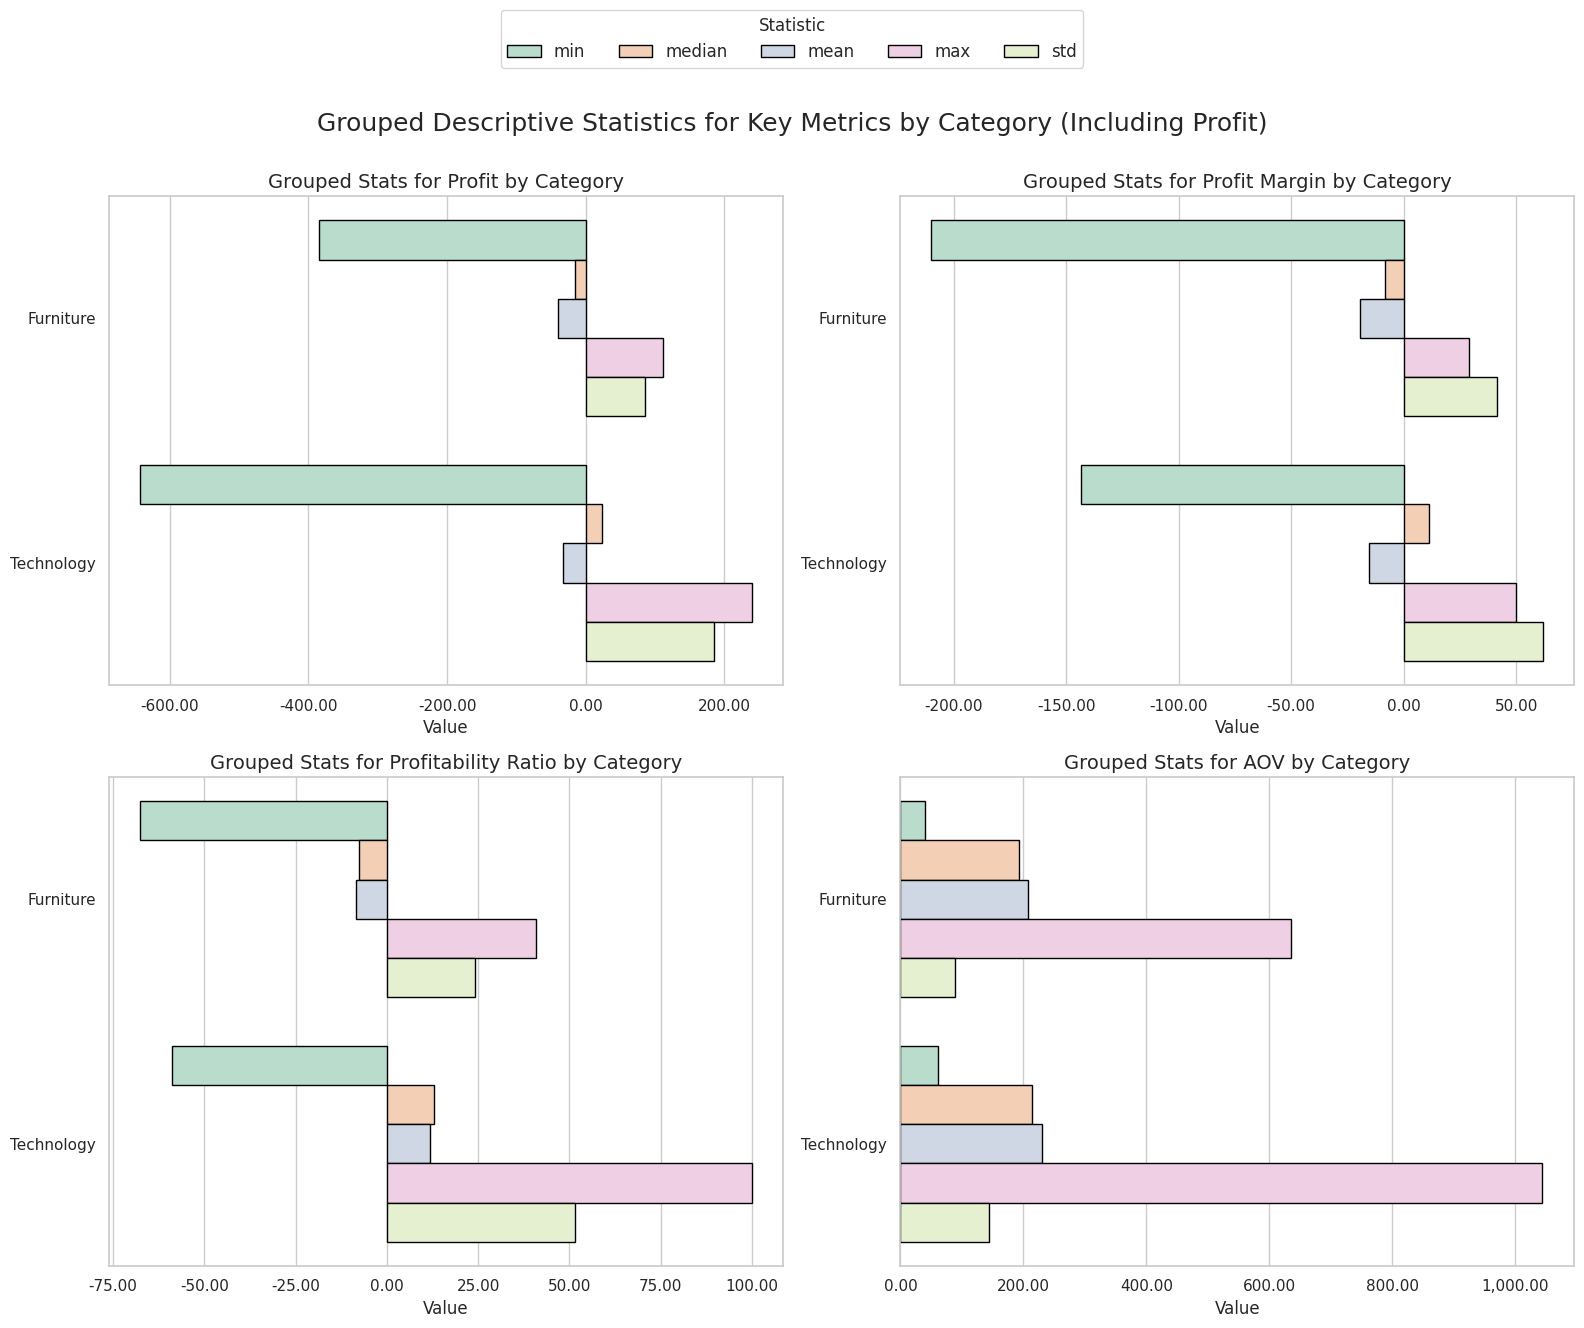

In [ ]:
# Define the columns to analyze, including Profit
columns_to_analyze = ['Profit', 'Profit Margin', 'Profitability Ratio', 'AOV']

# Create a 3x2 grid for grouped descriptive stats (extra row to accommodate added column)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Set Seaborn theme and color palette
sns.set_theme(style="whitegrid", context="notebook")
color_palette = "Pastel2"

# Iterate through columns and corresponding axes
for col, ax in zip(columns_to_analyze, axes.flatten()):
    # Calculate grouped stats for the column
    grouped_stats = metrics_df.groupby("Category", observed=True)[col].agg(
        min="min",
        median="median",
        mean="mean",
        max="max",
        std="std"
    ).reset_index()

    # Melt the DataFrame for easier plotting
    melted_stats = grouped_stats.melt(
        id_vars="Category",
        var_name="Statistic",
        value_name="Value"
    )

    # Create the barplot
    sns.barplot(
        data=melted_stats,
        x="Value", y="Category", hue="Statistic",
        palette=color_palette,
        edgecolor="black",
        ax=ax
    )

    # Format the plot
    ax.set_title(f"Grouped Stats for {col} by Category", fontsize=14)
    ax.set_xlabel("Value", fontsize=12)
    ax.set_ylabel("")
    ax.legend_.remove()  # Remove legend for individual plots
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:,.2f}"))

# Add a single legend for the entire grid
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title="Statistic", fontsize=12, loc="lower center", bbox_to_anchor=(0.5, 1.05), ncol=5)

# Adjust layout for better spacing
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.suptitle("Grouped Descriptive Statistics for Key Metrics by Category (Including Profit)", fontsize=18, y=1.02)
plt.show()


##Descriptive Statistics by Sub-Category

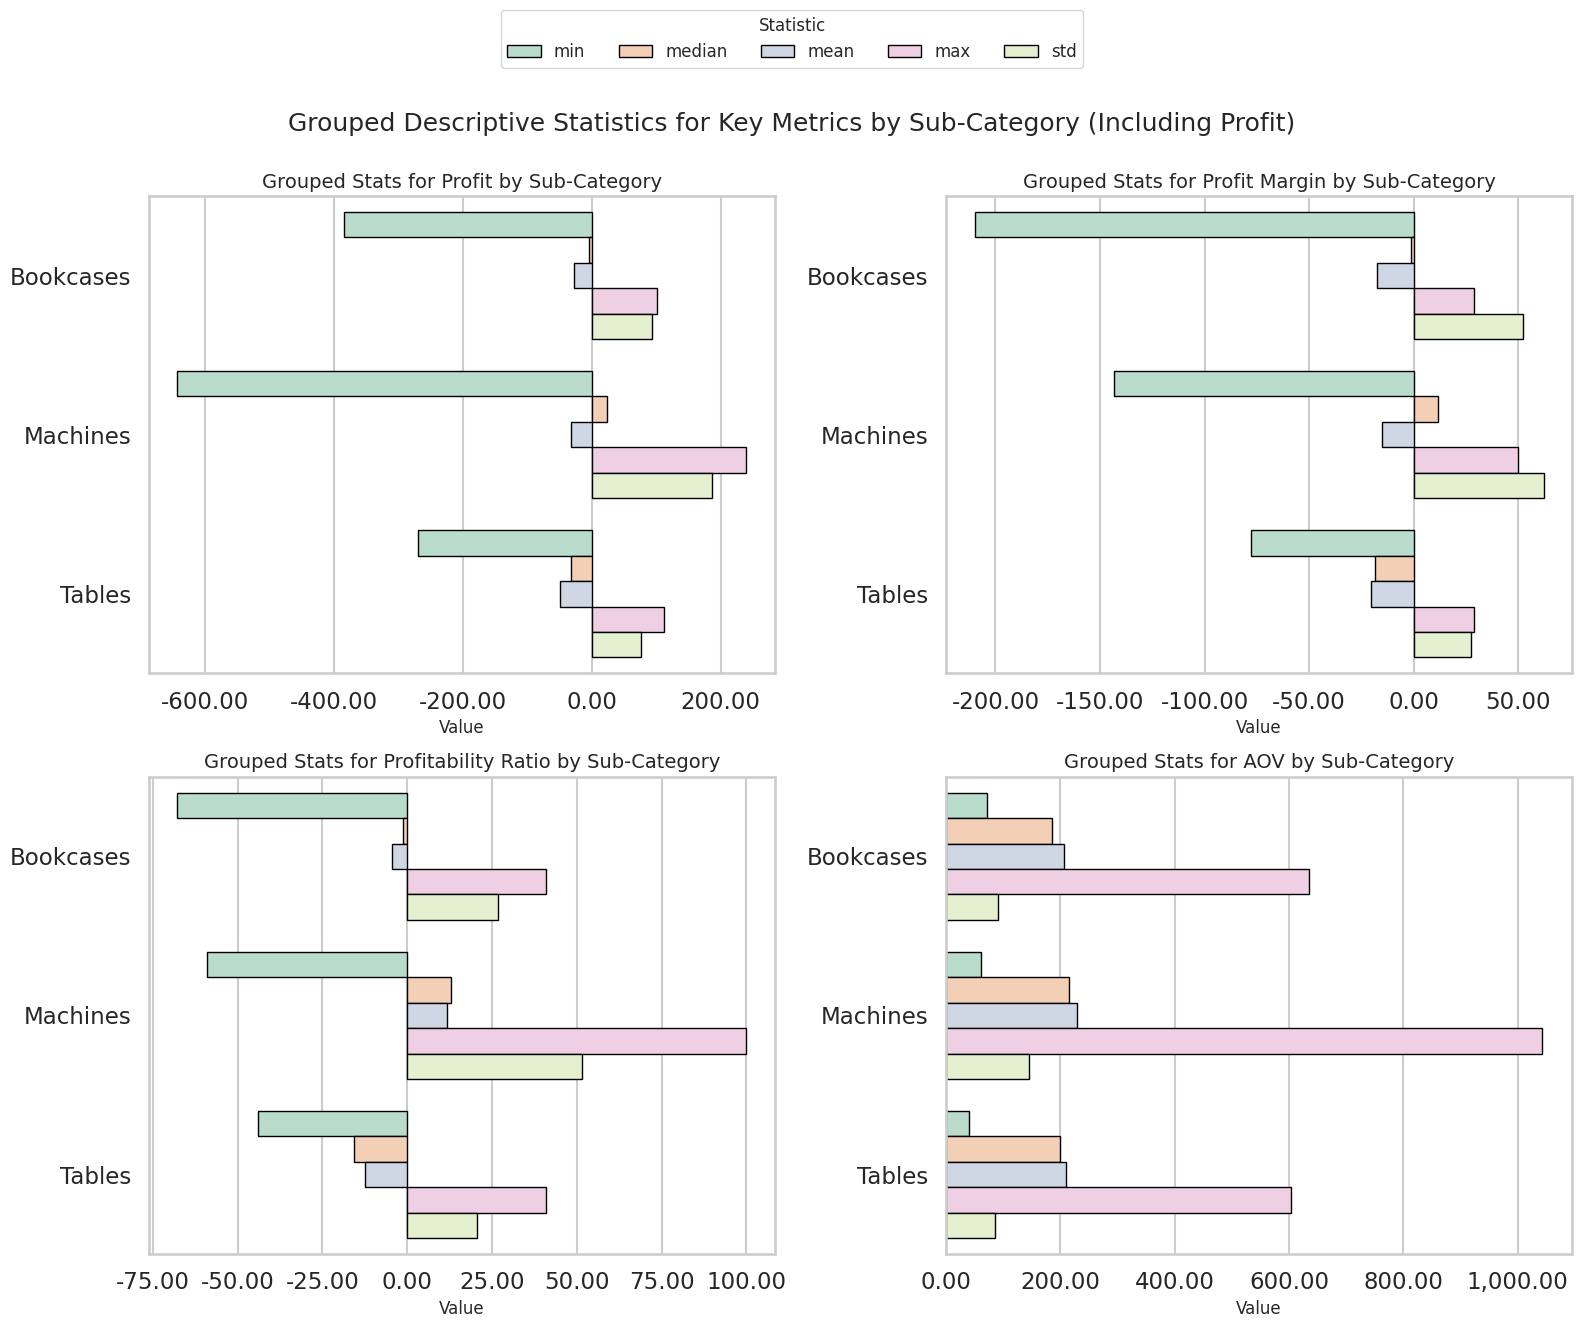

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns to analyze, including Profit
columns_to_analyze = ['Profit', 'Profit Margin', 'Profitability Ratio', 'AOV']

# Create a 2x2 grid for grouped descriptive stats
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Set Seaborn theme and color palette
sns.set_theme(style="whitegrid", context="notebook")
color_palette = "Pastel2"

# Iterate through columns and corresponding axes
for col, ax in zip(columns_to_analyze, axes.flatten()):
    # Calculate grouped stats for the column
    grouped_stats = metrics_df.groupby("Sub-Category", observed=True)[col].agg(
        min="min",
        median="median",
        mean="mean",
        max="max",
        std="std"
    ).reset_index()

    # Melt the DataFrame for easier plotting
    melted_stats = grouped_stats.melt(
        id_vars="Sub-Category",
        var_name="Statistic",
        value_name="Value"
    )

    # Create the barplot
    sns.barplot(
        data=melted_stats,
        x="Value", y="Sub-Category", hue="Statistic",
        palette=color_palette,
        edgecolor="black",
        ax=ax
    )

    # Format the plot
    ax.set_title(f"Grouped Stats for {col} by Sub-Category", fontsize=14)
    ax.set_xlabel("Value", fontsize=12)
    ax.set_ylabel("")
    ax.legend_.remove()  # Remove legend for individual plots
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:,.2f}"))

# Add a single legend for the entire grid
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title="Statistic", fontsize=12, loc="lower center", bbox_to_anchor=(0.5, 1.05), ncol=5)

# Adjust layout for better spacing
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.suptitle("Grouped Descriptive Statistics for Key Metrics by Sub-Category (Including Profit)", fontsize=18, y=1.02)
plt.show()


### Profit by Month


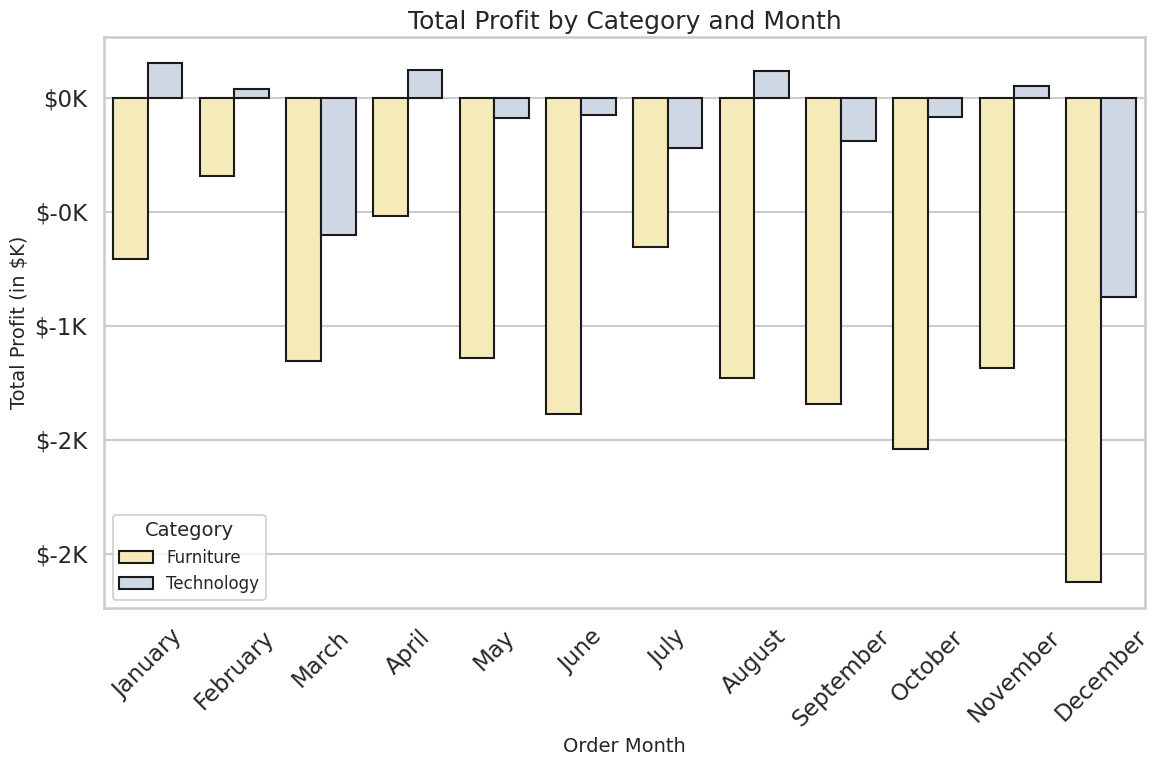

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up Seaborn theme
sns.set_theme(style="whitegrid", context="talk")

# Step 1: Aggregate profits by category and month
category_month_profits = (
    metrics_df.groupby(['Order Month', 'Category'], observed=True)['Profit']
    .sum()
    .reset_index()
)

# Step 2: Convert profits to thousands for readability
category_month_profits['Profit (in $K)'] = category_month_profits['Profit'] / 1000

# Step 3: Create the barplot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=category_month_profits,
    x='Order Month',
    y='Profit (in $K)',
    hue='Category',
    palette='Pastel2_r',
    edgecolor='k'
)

# Add formatting
plt.title("Total Profit by Category and Month", fontsize=18)
plt.xlabel("Order Month", fontsize=14)
plt.ylabel("Total Profit (in $K)", fontsize=14)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}K"))
plt.legend(title="Category", fontsize=12, title_fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


### Data Tables

In [ ]:
# Aggregate metrics by Sub-Category
aggregated_subcategory_table = df.groupby(['Sub-Category', 'Order Year'], observed=True).agg({
    'Profit': 'sum',
    'Profit Margin': 'mean',
    'Profitability Ratio': 'mean',
    'Estimated Cost': 'sum',
    'Effective Price': 'mean',
    'Sales': 'sum',
    'AOV': 'mean',
    'Quantity': 'sum',
    'Order Count': 'sum',
    'Sales_Customer': 'mean',
    'Profit_Customer': 'mean',
    'Discount': 'mean',
    'Shipping Time (Days)': 'mean'
}).reset_index()

# Sort the table by Profit (or any other metric of interest)
aggregated_subcategory_table = aggregated_subcategory_table.sort_values(by='Profit', ascending=True)
aggregated_subcategory_table

Sub-Category Order Year     Profit  Profit Margin  Profitability Ratio  \
10       Tables       2016 -2888.9299     -25.443459           -16.889889   
11       Tables       2017 -2160.5573     -16.960917            -9.442539   
8        Tables       2014 -2098.1006     -25.102141           -15.203777   
1     Bookcases       2015 -1736.4947     -23.801839            -6.735589   
3     Bookcases       2017 -1640.3788     -19.650996            -4.562285   
9        Tables       2015 -1488.6821     -15.952283            -9.990554   
6      Machines       2016 -1406.7416     -37.369048            -2.422594   
0     Bookcases       2014  -824.2277     -14.446338            -5.099449   
4      Machines       2014  -534.3414     -19.200000            12.976342   
2     Bookcases       2016  -492.0140     -11.427350            -1.065740   
5      Machines       2015  -422.7495      -8.166667             8.705653   
7      Machines       2017   713.9096       2.263492            26.816863   

    Estimated Cost  Effective Price       Sales         AOV  Quantity  \
10      13608.9589       170.004916  10720.0290  221.114484       113   
11      18143.3763       191.570395  15982.8190  193.058194       172   
8       11651.7601       176.022624   9553.6595  221.892714        89   
1       11441.5573       193.984906   9705.0626  211.711584       113   
3       15952.9342       186.760253  14312.5554  210.723201       182   
9       10069.2221       183.234250   8580.5400  210.462172        93   
6        4752.9436       136.236543   3346.2020  260.079709        48   
0        8224.2613       215.807687   7400.0336  220.606124        86   
4        2773.4574       140.749380   2239.1160  211.187918        31   
2        9627.3943       193.000254   9135.3803  186.592790       112   
5        3506.3165       165.643955   3083.5670  230.376932        31   
7        3082.5224       199.418787   3796.4320  213.516601        51   

    Order Count  Sales_Customer  Profit_Customer  Discount  \
10          288     1526.603417        63.123300  0.343902   
11          420     1280.587915        66.344611  0.273387   
8           260     1546.726797        85.596568  0.331081   
1           277     1477.439068       107.389055  0.247632   
3           420     1392.204351       112.230270  0.234098   
9           221     1395.612582       117.765518  0.281818   
6           102     1507.938857        14.407421  0.442857   
0           164     1318.709607        92.972607  0.222593   
4            78     1679.966560        51.183220  0.360000   
2           266     1259.547905        91.694803  0.199744   
5            69     1466.554091       110.924464  0.381818   
7           104     1498.386733       159.719113  0.280000   

    Shipping Time (Days)  
10              4.121951  
11              3.596774  
8               3.918919  
1               4.473684  
3               3.819672  
9               3.848485  
6               3.714286  
0               3.629630  
4               4.300000  
2               3.461538  
5               3.454545  
7               3.600000

### Analysis of Losses in Subcategories

The table highlights losses across specific subcategories over multiple years. Here's a detailed analysis:

---

### **Biggest Losers by Subcategory and Year**
1. **Tables**:
   - **Consistently Loss-Making**: Tables have significant losses across all years, with the largest loss in 2016 (\$-2888.93K).
   - **Cost and Discount Factors**:
     - **High Costs**: Estimated costs for Tables are substantial, averaging around \$13,608 in 2016 and \$18,143 in 2017.
     - **High Discounts**: Discounts consistently hover around 27%-34%.
   - **Profitability Ratio**: Negative profitability ratios, with the lowest at -16.88% in 2016, indicate deep losses relative to costs.

2. **Bookcases**:
   - **Significant Losses**: Bookcases show consistent losses, particularly in 2015 (\$-1736.49K) and 2017 (\$-1640.37K).
   - **Cost and Discount Factors**:
     - **High Costs**: Estimated costs are high, averaging \$11,441 in 2015 and \$15,952 in 2017.
     - **Moderate Discounts**: Discounts are lower compared to Tables, ranging between 19%-24%.
   - **Profit Margin**: Low margins, particularly -23.80% in 2015, suggest inefficient pricing or high cost of sales.

3. **Machines**:
   - **Mixed Performance**: Machines show a significant loss in 2016 (\$-1406.74K) but a profit in 2017 (\$713.90K).
   - **Cost and Discount Factors**:
     - **High Discounts**: Discounts reach a peak of 44% in 2016, contributing to losses.
     - **Lower Costs**: Costs are relatively moderate (\$4752 in 2016).
   - **Profitability Ratio**: Negative ratios in loss years (e.g., -2.42% in 2016) contrast with a strong positive ratio in 2017 (26.82%).

---

### **Trends Contributing to Losses**
1. **High Costs**:
   - Subcategories like Tables and Bookcases consistently have high estimated costs relative to sales. This indicates inefficiency in production or sourcing.

2. **High Discounts**:
   - Discounts are a major driver of losses, especially for Tables and Machines. Discounts over 30%-40% severely impact profitability.

3. **Low Profit Margins**:
   - Negative or very low profit margins across loss years indicate a lack of pricing power or overly aggressive discounting.

4. **Declining Performance Over Time**:
   - Losses for Tables increased from 2014 (\$-2098.10K) to 2016 (\$-2888.93K) before reducing slightly in 2017. This suggests some corrective actions might have been taken but were insufficient.

---

### Recommendations for Further Exploration
1. **Focus on Costs**:
   - Investigate why Tables and Bookcases have such high costs compared to their sales. Are there inefficiencies in production or supply chain issues?

2. **Reassess Discounts**:
   - Review the effectiveness of discounts. High discounts, particularly for Tables and Machines, may not be driving sufficient sales to justify the revenue loss.

3. **Category-Specific Analysis**:
   - Conduct deeper dives into product-level data within these subcategories to identify specific items driving losses.

4. **Regional and Customer Segment Analysis**:
   - Analyze regional and customer segment performance for these subcategories to identify whether certain markets or demographics are driving the losses.

---

This analysis confirms that Tables, Bookcases, and Machines are the biggest contributors to overall losses. High costs, high discounts, and low profit margins are the primary drivers. These insights can guide targeted actions to reduce losses in these areas.

To explore these trends effectively, we can visualize the data using targeted plots. Here’s how we can address each trend:

---

### **1. High Costs**
**Objective**: Compare **Estimated Cost** and **Sales** across subcategories and years.

- **Plot Type**: Line plots with dual y-axes for **Estimated Cost** and **Sales**.
- **Grouping**: Subcategories over time (years).

**Approach**:
- Use a single figure with subplots (one for each subcategory).
- Plot **Estimated Cost** and **Sales** together to see how costs compare to sales.

---

### **2. High Discounts**
**Objective**: Highlight the percentage of **Discount** offered over time and its correlation with **Profit**.

- **Plot Type**: Scatter plot or bar plot showing **Discount** percentages over years.
- **Additional Insight**: Use **Profit** as a color gradient or add a secondary y-axis for **Profit**.

**Approach**:
- Create a scatter plot (Discount vs. Year) with **Profit** as the size or color.

---

### **3. Low Profit Margins**
**Objective**: Assess the **Profit Margin** trends over time and compare them to **Profit**.

- **Plot Type**: Line plot or area plot showing **Profit Margin** over time.
- **Grouping**: By subcategories.

**Approach**:
- Use one line plot per subcategory to show the decline in profit margins.

---

### **4. Declining Performance Over Time**
**Objective**: Show the trend of **Profit** over the years.

- **Plot Type**: Line plot with separate lines for each subcategory.
- **Additional Insight**: Add a reference line at \$0 to highlight years of loss.

**Approach**:
- Create a single line plot, grouping by subcategories.

---

### **Summary of Suggested Plots**
1. **Estimated Cost vs. Sales**: Line plots to compare cost vs. sales trends by year.
2. **Discount and Profit**: Scatter plot showing discounts and profits by year.
3. **Profit Margin Trends**: Line plot showing profit margin trends by year for each subcategory.
4. **Profit Trends**: Line plot showing profit trends by year for each subcategory.



In [ ]:
print(metrics_df['Category'].cat.categories)
print(metrics_df['Sub-Category'].cat.categories)
print(df['Category'].cat.categories)
print(df['Sub-Category'].cat.categories)

Index(['Furniture', 'Technology'], dtype='object')
Index(['Bookcases', 'Machines', 'Tables'], dtype='object')
Index(['Furniture', 'Technology'], dtype='object')
Index(['Bookcases', 'Machines', 'Tables'], dtype='object')


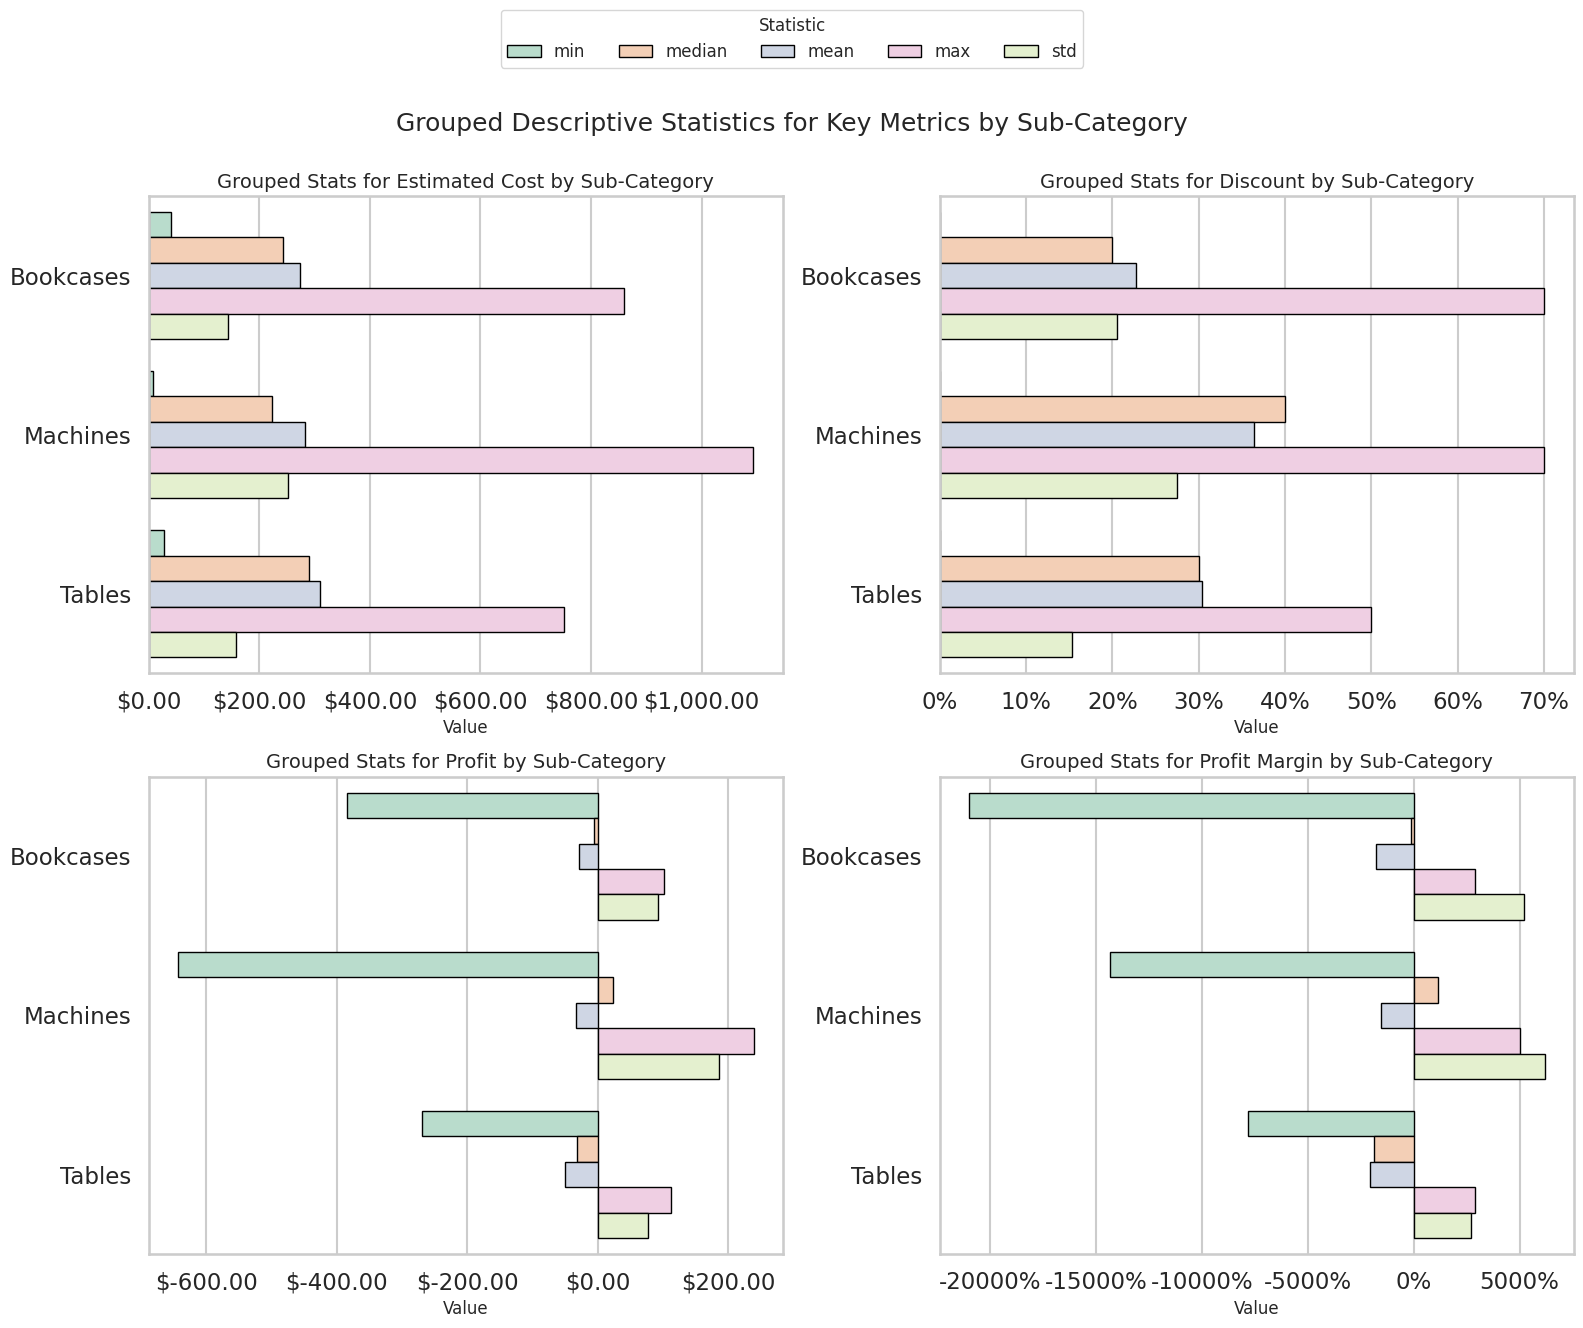

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns to analyze
columns_to_analyze = ['Estimated Cost', 'Discount', 'Profit', 'Profit Margin']

# Create a 2x2 grid for grouped descriptive stats
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Set Seaborn theme and color palette
sns.set_theme(style="whitegrid", context="notebook")
color_palette = "Pastel2"

# Iterate through columns and corresponding axes
for col, ax in zip(columns_to_analyze, axes.flatten()):
    # Calculate grouped stats for the column
    grouped_stats = df.groupby("Sub-Category", observed=True)[col].agg(
        min="min",
        median="median",
        mean="mean",
        max="max",
        std="std"
    ).reset_index()

    # Melt the DataFrame for easier plotting
    melted_stats = grouped_stats.melt(
        id_vars="Sub-Category",
        var_name="Statistic",
        value_name="Value"
    )

    # Create the barplot
    sns.barplot(
        data=melted_stats,
        x="Value", y="Sub-Category", hue="Statistic",
        palette=color_palette,
        edgecolor="black",
        ax=ax
    )

    # Format the plot
    ax.set_title(f"Grouped Stats for {col} by Sub-Category", fontsize=14)
    ax.set_xlabel("Value", fontsize=12)
    ax.set_ylabel("")
    ax.legend_.remove()  # Remove legend for individual plots
    if col in ['Discount', 'Profit Margin']:
        ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0%}"))  # Format percentages
    else:
        ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.2f}"))  # Format monetary values

# Add a single legend for the entire grid
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title="Statistic", fontsize=12, loc="lower center", bbox_to_anchor=(0.5, 1.05), ncol=5)

# Adjust layout for better spacing
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.suptitle("Grouped Descriptive Statistics for Key Metrics by Sub-Category", fontsize=18, y=1.02)
plt.show()


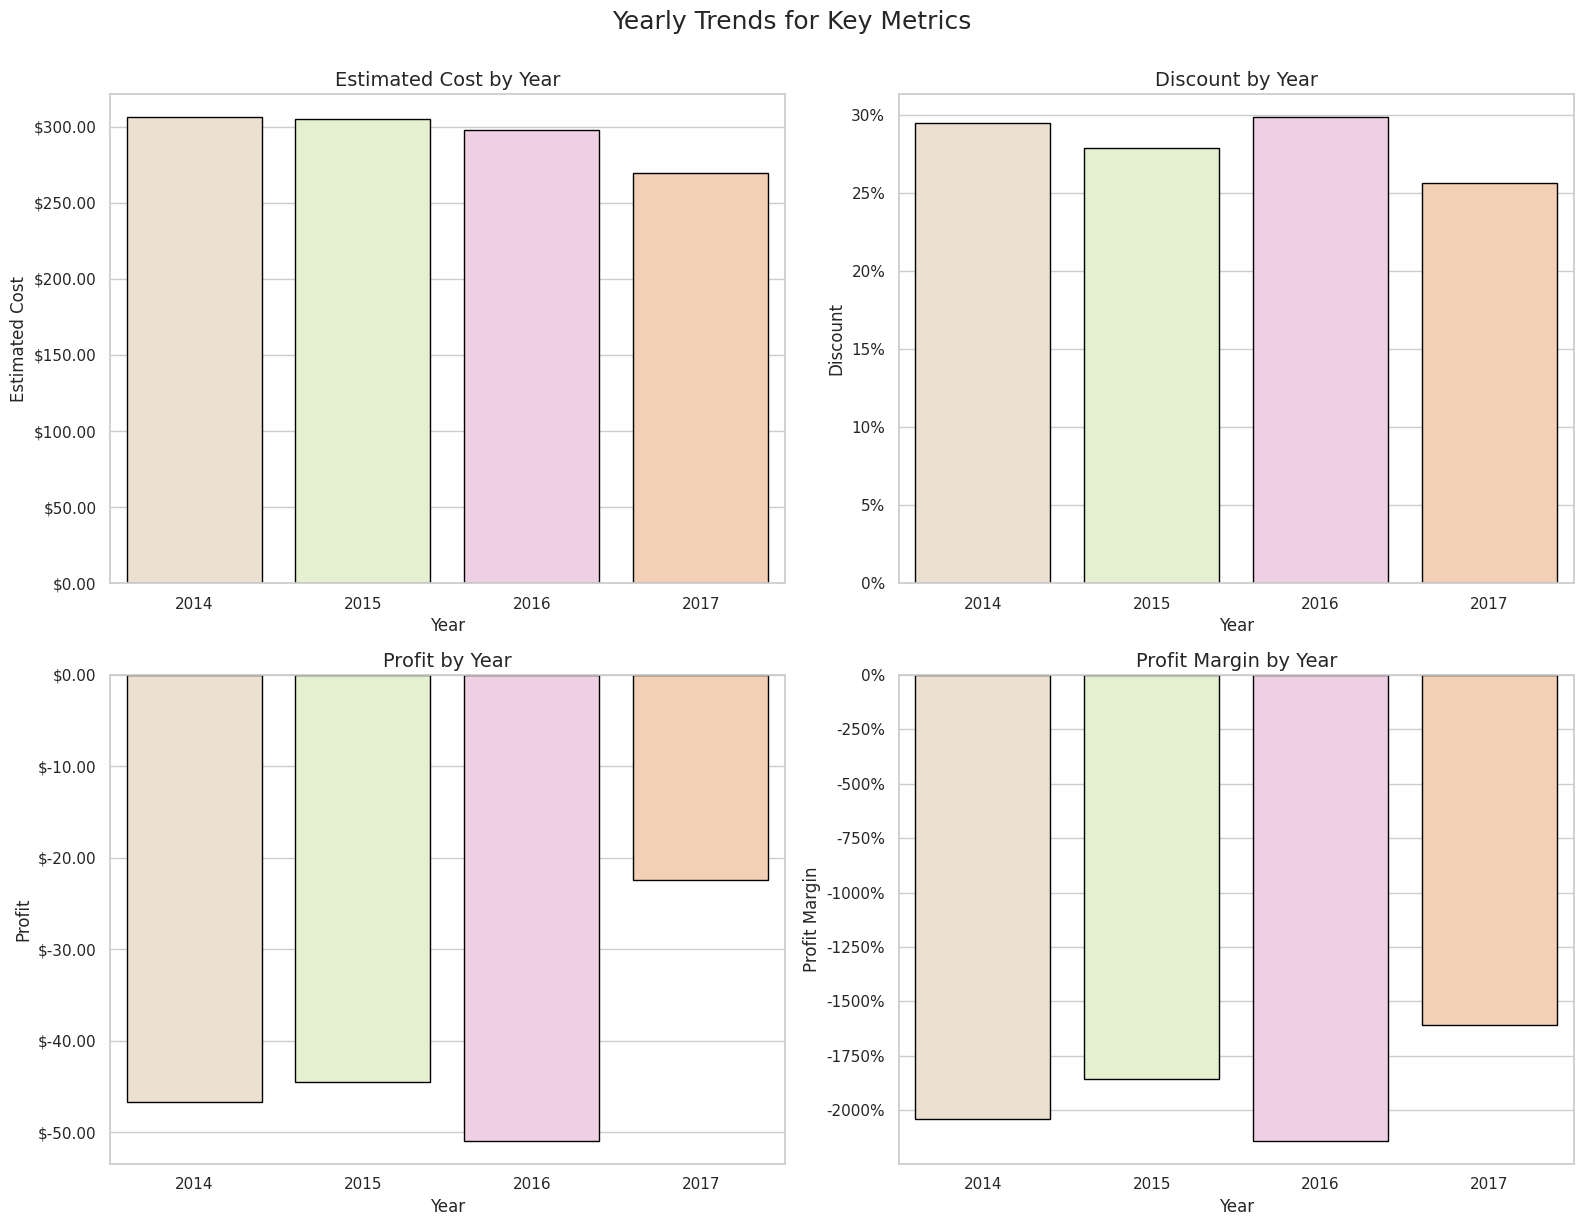

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the metrics to analyze
metrics_to_plot = ['Estimated Cost', 'Discount', 'Profit', 'Profit Margin']

# Create a 2x2 grid for the barplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Set Seaborn theme and color palette
sns.set_theme(style="whitegrid", context="notebook")
color_palette = "Pastel2_r"

# Iterate through the metrics and axes
for metric, ax in zip(metrics_to_plot, axes.flatten()):
    # Aggregate the data by year
    grouped_data = df.groupby(['Order Year'], observed=True)[metric].mean().reset_index()

    # Create the barplot
    sns.barplot(
        data=grouped_data,
        x="Order Year",
        y=metric,
        hue="Order Year", palette=color_palette,
        edgecolor="black", legend=False,
        ax=ax
    )

    # Format the plot
    ax.set_title(f"{metric} by Year", fontsize=14)
    ax.set_xlabel("Year", fontsize=12)
    ax.set_ylabel(metric, fontsize=12)

    # Custom formatting for percentages and monetary values
    if metric in ['Discount', 'Profit Margin']:
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0%}"))  # Format as percentage
    else:
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.2f}"))  # Format as monetary value

# Adjust layout for better spacing
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.suptitle("Yearly Trends for Key Metrics", fontsize=18, y=1.02)
plt.show()


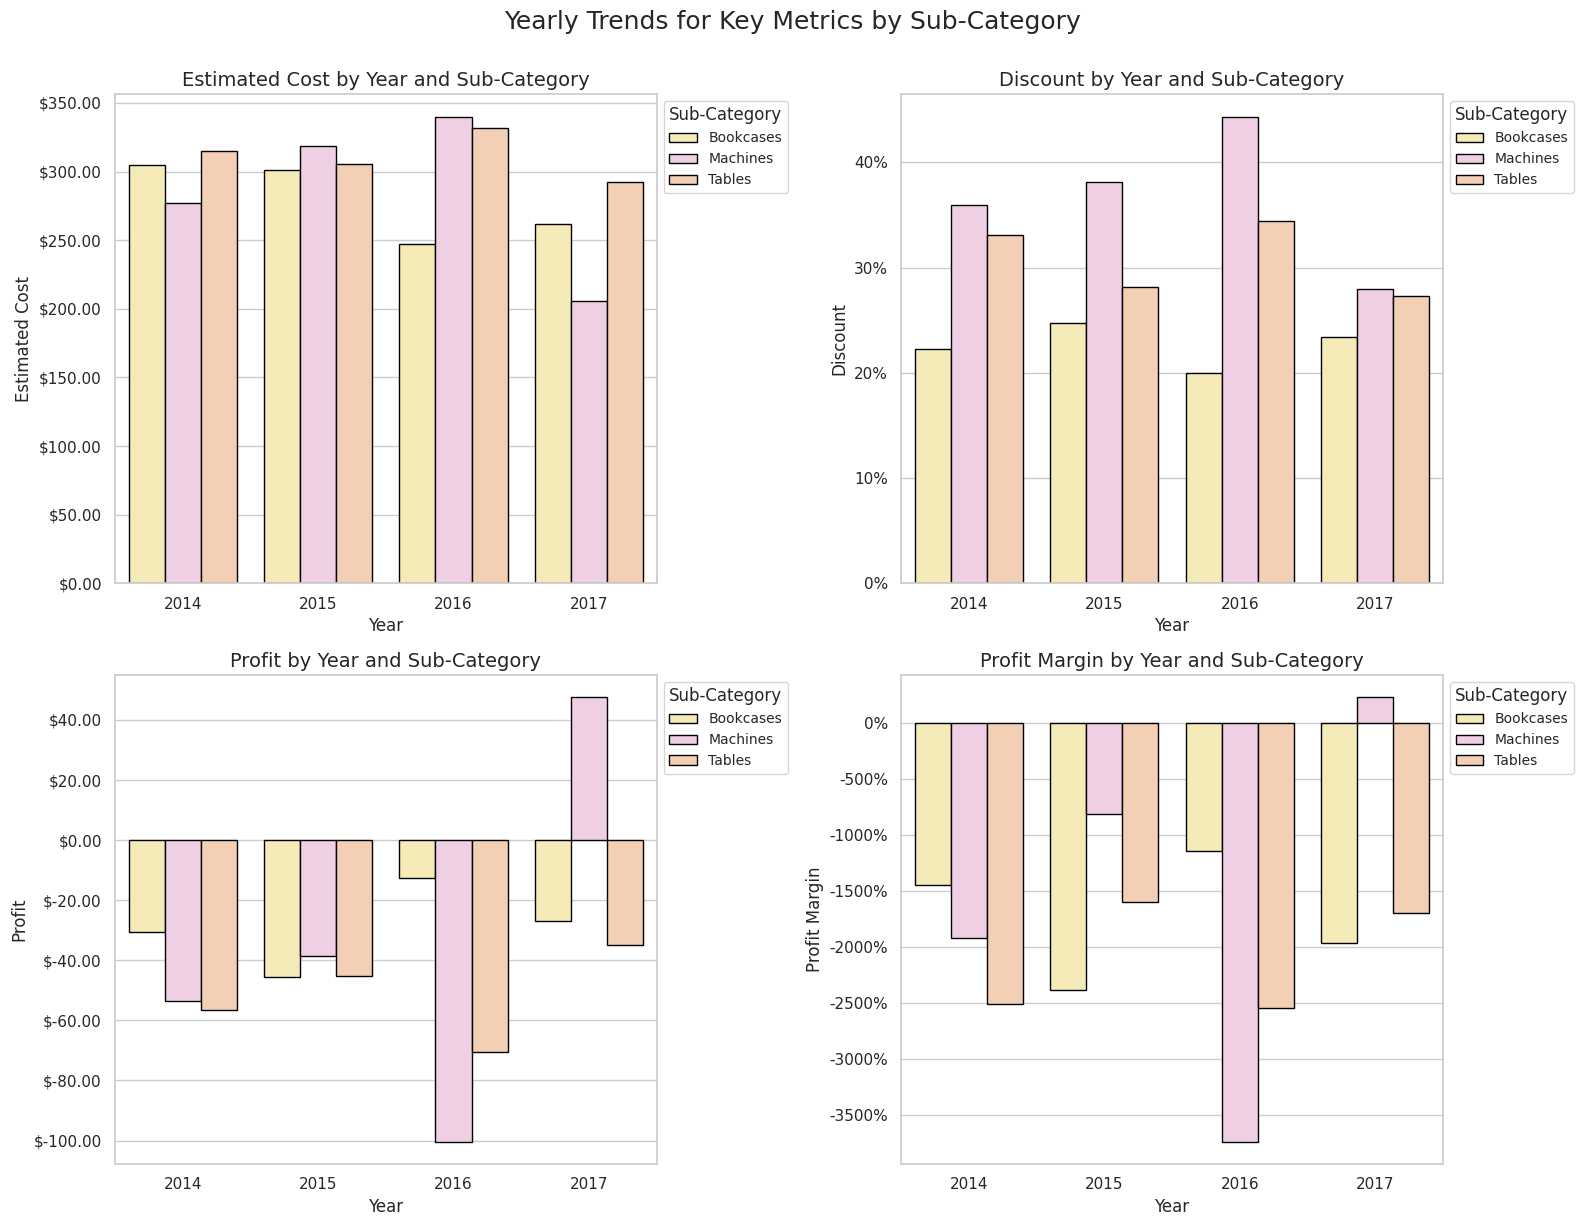

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the metrics to analyze
metrics_to_plot = ['Estimated Cost', 'Discount', 'Profit', 'Profit Margin']

# Create a 2x2 grid for the barplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Set Seaborn theme and color palette
sns.set_theme(style="whitegrid", context="notebook")
color_palette = sns.color_palette("Pastel2_r", len(df['Sub-Category'].cat.categories))

# Iterate through the metrics and axes
for metric, ax in zip(metrics_to_plot, axes.flatten()):
    # Aggregate the data by year and sub-category
    grouped_data = df.groupby(['Order Year', 'Sub-Category'], observed=True)[metric].mean().reset_index()

    # Create the barplot
    sns.barplot(
        data=grouped_data,
        x="Order Year",
        y=metric,
        hue="Sub-Category",
        palette=color_palette,
        edgecolor="black",
        ax=ax
    )

    # Format the plot
    ax.set_title(f"{metric} by Year and Sub-Category", fontsize=14)
    ax.set_xlabel("Year", fontsize=12)
    ax.set_ylabel(metric, fontsize=12)

    # Custom formatting for percentages and monetary values
    if metric in ['Discount', 'Profit Margin']:
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0%}"))  # Format as percentage
    else:
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.2f}"))  # Format as monetary value

    # Adjust the legend for readability
    ax.legend(title="Sub-Category", fontsize=10, title_fontsize=12, loc="upper left", bbox_to_anchor=(1, 1))

# Adjust layout for better spacing
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.suptitle("Yearly Trends for Key Metrics by Sub-Category", fontsize=18, y=1.02)
plt.show()


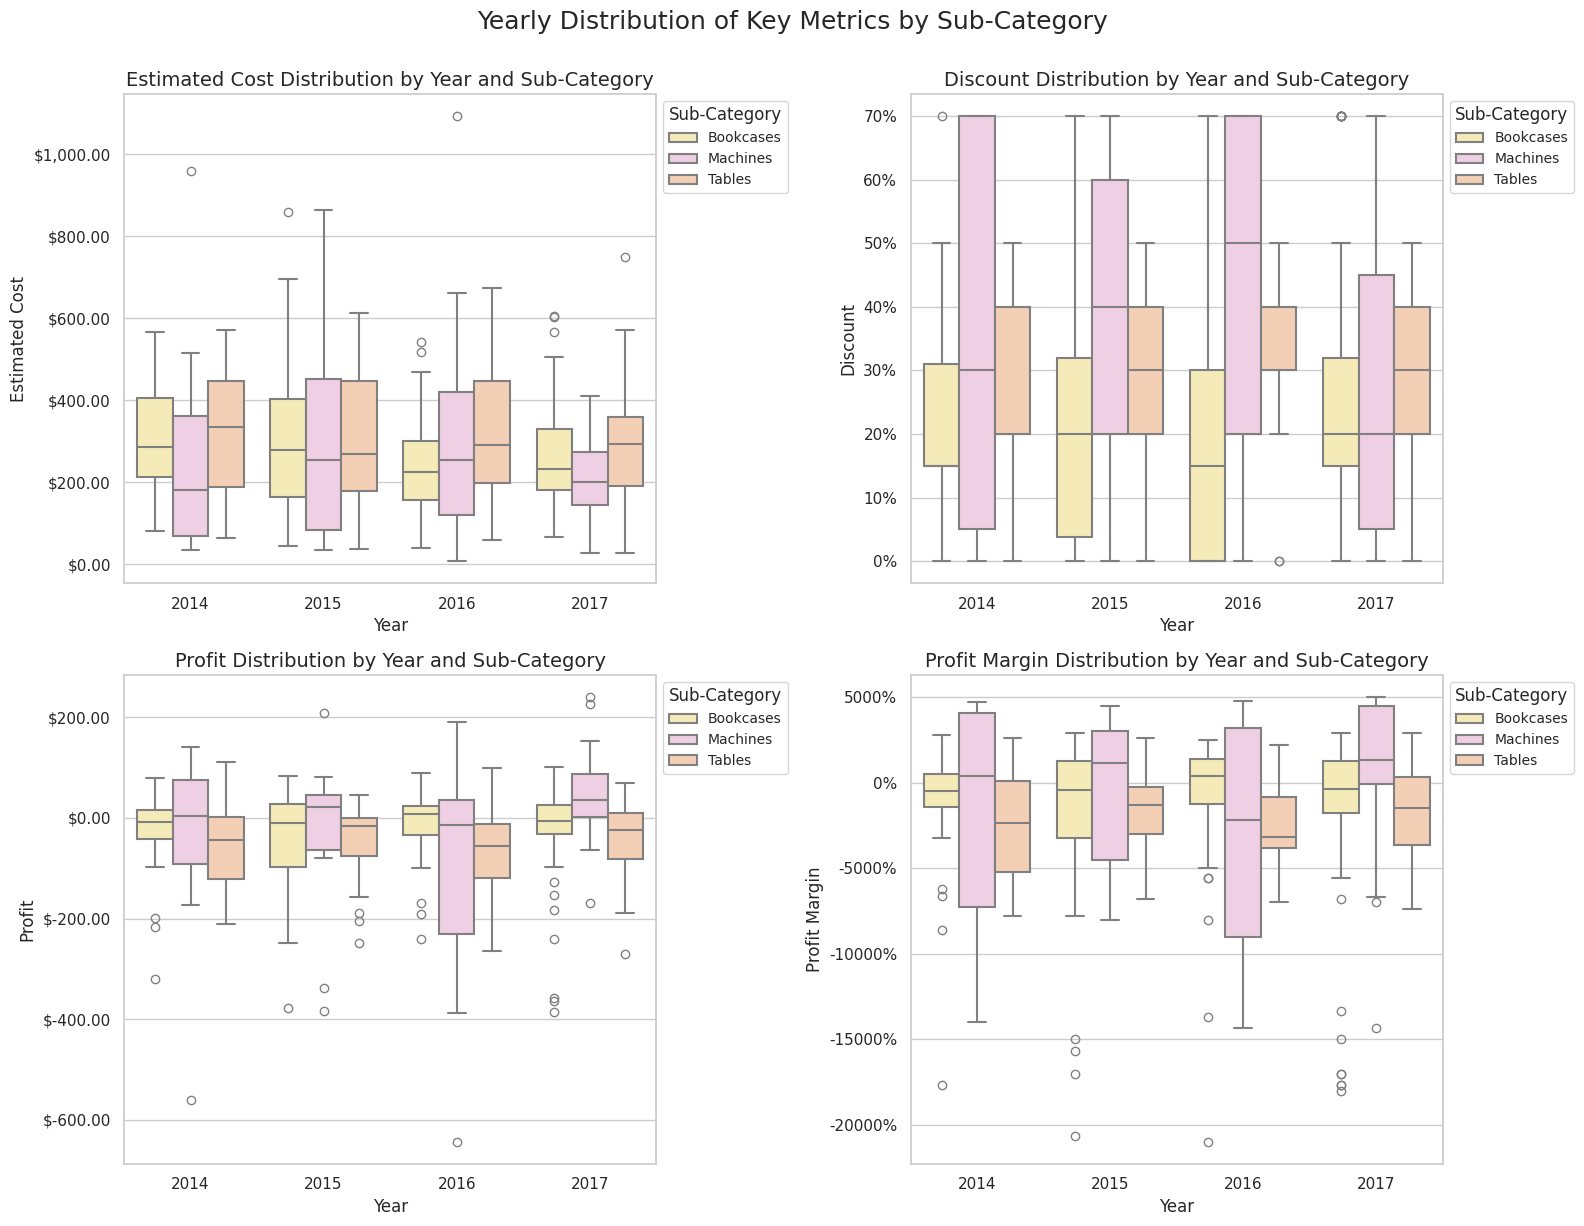

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the metrics to analyze
metrics_to_plot = ['Estimated Cost', 'Discount', 'Profit', 'Profit Margin']

# Create a 2x2 grid for the boxplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Set Seaborn theme and color palette
sns.set_theme(style="whitegrid", context="notebook")
color_palette = sns.color_palette("Pastel2_r", len(df['Sub-Category'].cat.categories))

# Iterate through the metrics and axes
for metric, ax in zip(metrics_to_plot, axes.flatten()):
    # Create the boxplot
    sns.boxplot(
        data=df,
        x="Order Year",
        y=metric,
        hue="Sub-Category",
        palette=color_palette,
        linewidth=1.5,
        ax=ax
    )

    # Format the plot
    ax.set_title(f"{metric} Distribution by Year and Sub-Category", fontsize=14)
    ax.set_xlabel("Year", fontsize=12)
    ax.set_ylabel(metric, fontsize=12)

    # Custom formatting for percentages and monetary values
    if metric in ['Discount', 'Profit Margin']:
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0%}"))  # Format as percentage
    else:
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.2f}"))  # Format as monetary value

    # Adjust the legend for readability
    ax.legend(title="Sub-Category", fontsize=10, title_fontsize=12, loc="upper left", bbox_to_anchor=(1, 1))

# Adjust layout for better spacing
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.suptitle("Yearly Distribution of Key Metrics by Sub-Category", fontsize=18, y=1.02)
plt.show()


Based on the data provided, **Machines** and **Tables** stand out as the subcategories with significant losses, driven by high costs and large discounts. Here's a detailed breakdown:

---

### **Key Observations**
#### **1. Machines:**
   - **High Discounts:** The discount for Machines often exceeds 30%, reaching as high as 44% in 2016.
   - **High Costs Relative to Sales:** Machines consistently show a high **Estimated Cost-to-Sales Ratio**, which severely impacts profit margins.
   - **Variable Performance:** In 2017, Machines generated a modest profit ($713.91) due to better cost control and lower discounts. However, the losses in previous years (2014-2016) make it a critical subcategory to address.
   - **Profit Margins:** Extremely low or negative, as in 2016 (-37%).

#### **2. Tables:**
   - **Consistently High Losses:** Tables exhibit the largest total losses, with 2016 being the worst year (-$2888.93K).
   - **High Costs:** Estimated costs are particularly high, and they increased significantly from 2014 to 2017.
   - **High Discounts:** Discounts remain above 30% in most years, which contributes heavily to profitability issues.

#### **3. Bookcases:**
   - **Moderate Losses:** While Bookcases have smaller losses compared to Tables, they still represent a problem, with significant losses in 2015 and 2017.
   - **Lower Discounts:** Discounts for Bookcases are generally lower than for Tables and Machines, indicating that high costs are the primary driver of losses here.
   - **Consistently Negative Margins:** Profit margins remain negative, showing inefficiencies in pricing or sourcing.

---

### **Order of Subcategories to Address**
1. **Tables:**
   - Largest total losses.
   - High costs and consistently large discounts make this the most critical subcategory to address.
   - Immediate action is required to optimize sourcing, reduce discounts, and control costs.

2. **Machines:**
   - High discount rates and cost inefficiencies lead to significant losses.
   - While 2017 showed some improvement, sustained efforts are needed to reduce discounts and improve cost-to-sales efficiency.

3. **Bookcases:**
   - Moderate losses compared to Tables and Machines.
   - Addressing sourcing inefficiencies or adjusting pricing strategies could yield positive results, but it is less urgent than Tables and Machines.

---

### **Strategic Recommendations**
1. **Focus on Cost Optimization:**
   - For Tables and Machines, review sourcing strategies and negotiate better supplier terms.
   - For Bookcases, explore ways to reduce production or procurement costs.

2. **Discount Policies:**
   - Implement stricter discounting policies, especially for Machines and Tables, to minimize the impact of deep discounts.

3. **Pricing Adjustments:**
   - Evaluate pricing strategies to ensure sufficient margins, particularly for Bookcases.

4. **Performance Monitoring:**
   - Use dashboards to continuously monitor these subcategories, focusing on costs, discounts, and margins over time.

5. **Pilot Changes:**
   - Start with Tables (biggest losses) to test the effectiveness of new strategies before rolling them out to Machines and Bookcases.

---

By prioritizing Tables and Machines, you can address the most pressing issues and make the largest impact on reducing losses. This targeted approach ensures resources are focused where they will have the greatest effect.

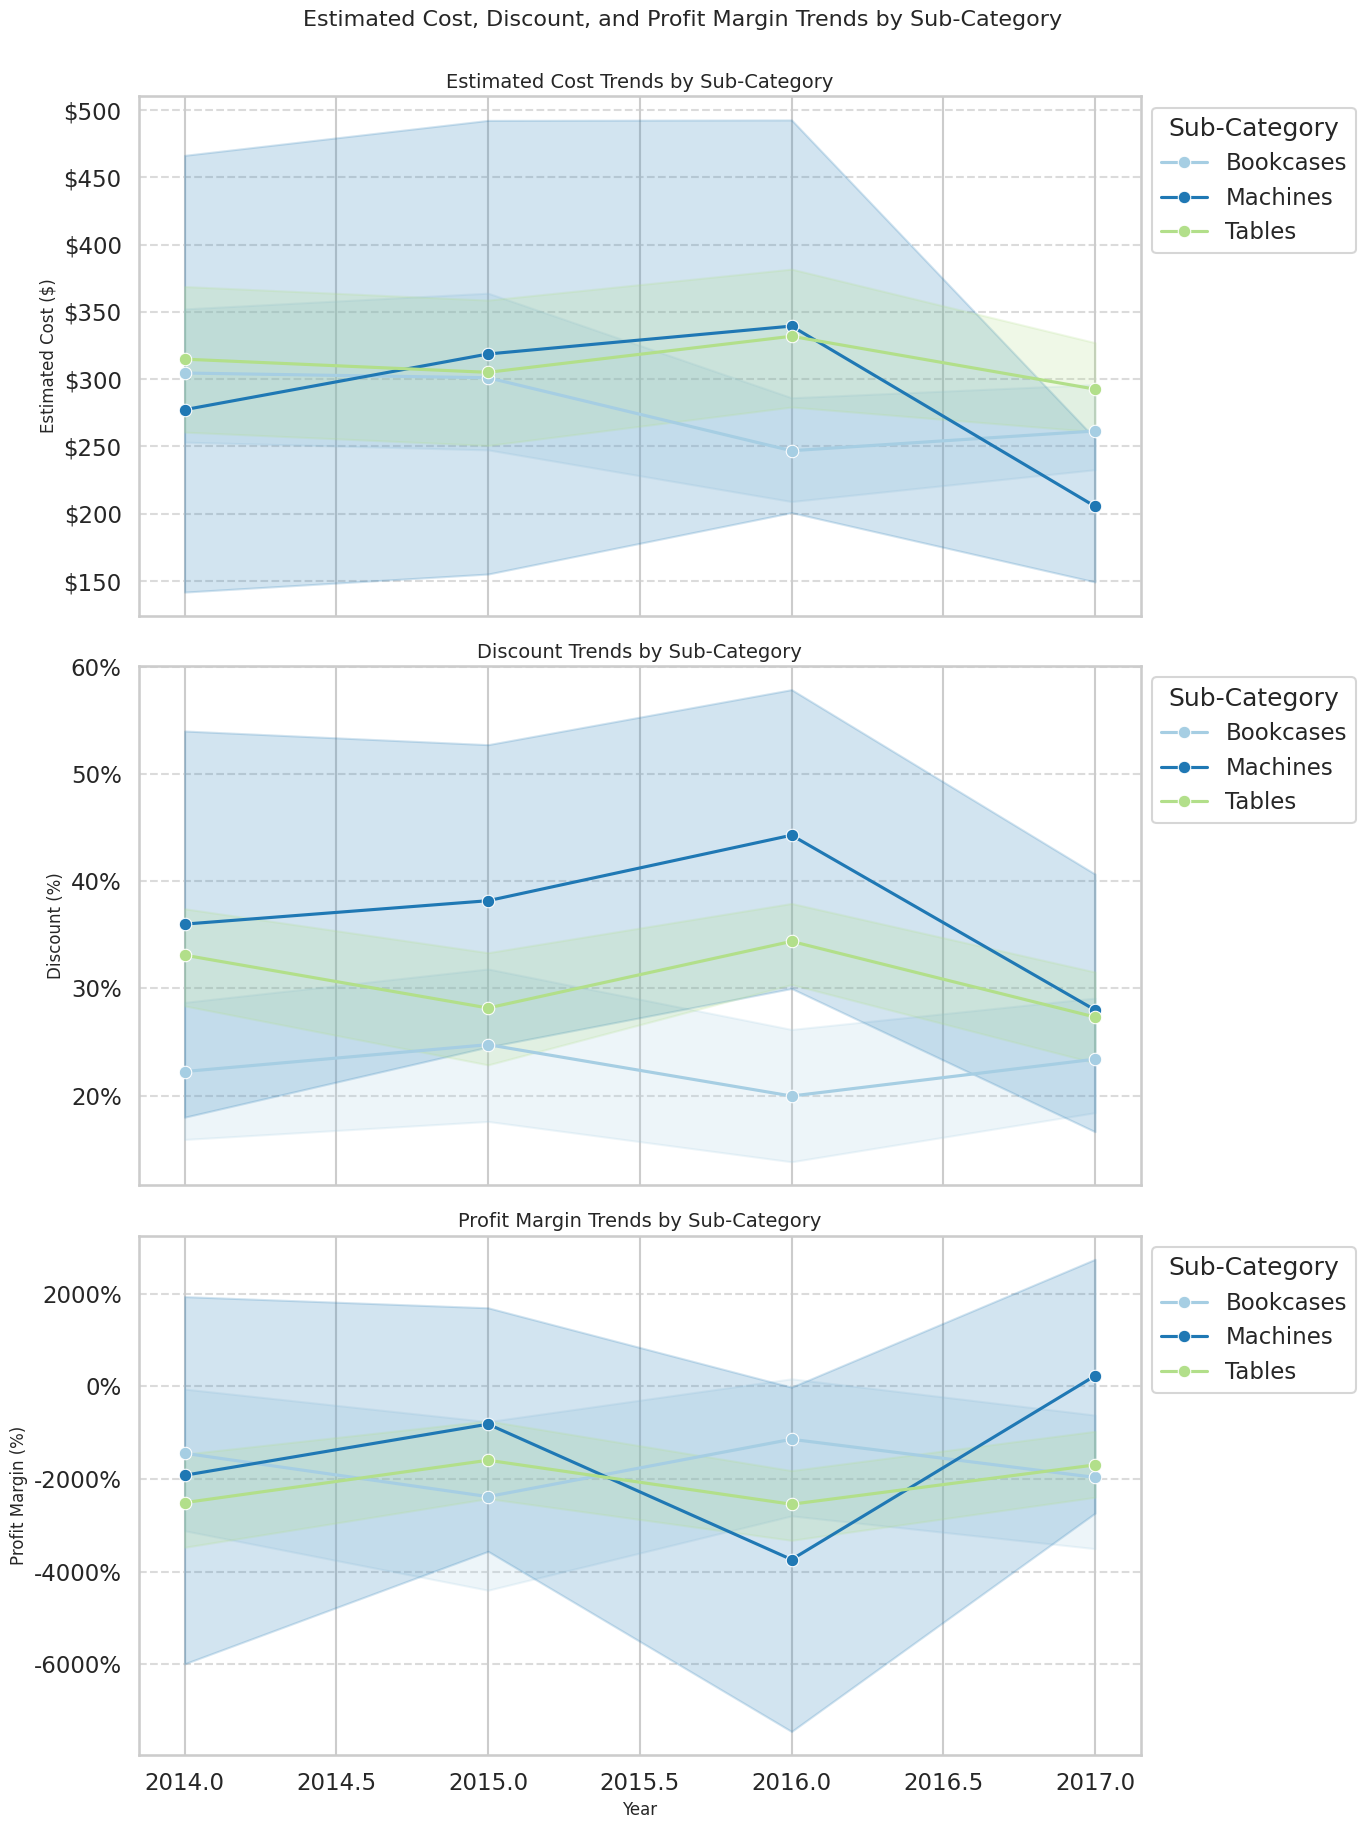

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up Seaborn theme
sns.set_theme(style="whitegrid", context="talk")
palette = "Paired"

# Create a 3x1 grid for visualizing Estimated Cost, Discounts, and Profit Margins
fig, axes = plt.subplots(3, 1, figsize=(14, 18), sharex=True)

# Plot Estimated Cost trends by year and subcategory
sns.lineplot(
    data=df,
    x="Order Year",
    y="Estimated Cost",
    hue="Sub-Category",
    marker="o",
    palette=palette,
    ax=axes[0]
)
axes[0].set_title("Estimated Cost Trends by Sub-Category", fontsize=14)
axes[0].set_xlabel("")
axes[0].set_ylabel("Estimated Cost ($)", fontsize=12)
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))
axes[0].grid(axis='y', linestyle="--", alpha=0.7)
axes[0].legend(title="Sub-Category", loc="upper left", bbox_to_anchor=(1, 1))

# Plot Discount trends by year and subcategory
sns.lineplot(
    data=df,
    x="Order Year",
    y="Discount",
    hue="Sub-Category",
    marker="o",
    palette=palette,
    ax=axes[1]
)
axes[1].set_title("Discount Trends by Sub-Category", fontsize=14)
axes[1].set_xlabel("")
axes[1].set_ylabel("Discount (%)", fontsize=12)
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0%}"))
axes[1].grid(axis='y', linestyle="--", alpha=0.7)
axes[1].legend(title="Sub-Category", loc="upper left", bbox_to_anchor=(1, 1))

# Plot Profit Margin trends by year and subcategory
sns.lineplot(
    data=df,
    x="Order Year",
    y="Profit Margin",
    hue="Sub-Category",
    marker="o",
    palette=palette,
    ax=axes[2]
)
axes[2].set_title("Profit Margin Trends by Sub-Category", fontsize=14)
axes[2].set_xlabel("Year", fontsize=12)
axes[2].set_ylabel("Profit Margin (%)", fontsize=12)
axes[2].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0%}"))
axes[2].grid(axis='y', linestyle="--", alpha=0.7)
axes[2].legend(title="Sub-Category", loc="upper left", bbox_to_anchor=(1, 1))

# Adjust layout for better spacing
plt.tight_layout()
plt.suptitle("Estimated Cost, Discount, and Profit Margin Trends by Sub-Category", fontsize=16, y=1.02)
plt.show()



At this point, given the trends and findings, here are some additional data analyses that might provide deeper insights and actionable steps:

---

### **1. Trend Analysis by Product Volume**
   - Analyze **Quantity Sold** over time for each subcategory. This will help determine if the losses are being driven by high sales volumes at low margins or by inefficient pricing of low-volume products.
   - **Plot Idea:** Line plot of quantity sold over time by subcategory.

---

### **2. Customer Segmentation**
   - Investigate if specific customer segments (e.g., based on regions, demographics, or repeat customers) contribute disproportionately to losses.
   - Analyze profitability by **Customer Segment** or **Region** to identify areas where pricing strategies might need adjustment.
   - **Plot Idea:** Bar plot showing profit by segment or region.

---

### **3. Discount Effectiveness**
   - Compare profitability metrics (Profit, Profit Margin, etc.) for discounted orders vs. non-discounted orders.
   - Assess if discounts actually lead to increased sales volumes or if they erode profitability without a corresponding increase in revenue.
   - **Plot Idea:** Boxplot of profit margins by discount ranges (e.g., 0-10%, 10-20%, etc.).

---

### **4. Cross-Category Impact**
   - Examine if loss-making subcategories like Machines and Tables are part of bundled sales or promotions. Are losses in one category driving profitability in others (e.g., upselling Technology products)?
   - Analyze the correlation between subcategories to identify possible cross-selling effects.

---

### **5. Seasonal Impact**
   - Examine **Seasonal Trends** (e.g., monthly or quarterly analysis) to determine if losses align with certain times of the year, such as during heavy promotions or holiday seasons.
   - **Plot Idea:** Heatmap of profitability by month and subcategory.

---

### **6. Cost Component Analysis**
   - Break down **Estimated Costs** into subcomponents (if available) like shipping, labor, and raw materials. Determine if specific cost drivers (e.g., shipping costs for Tables or production costs for Machines) are disproportionately high.
   - **Actionable Insights:** Adjust supply chain or renegotiate supplier contracts for cost optimization.

---

### **7. Time-to-Profit Analysis**
   - Investigate **Shipping Time (Days)** vs. Profitability to determine if faster shipping times correlate with higher customer satisfaction and profitability.
   - **Plot Idea:** Scatter plot of shipping time vs. profitability, color-coded by subcategory.

---

### **8. Pricing Elasticity**
   - Perform a **Pricing Elasticity Analysis** to understand the relationship between **Effective Price** and sales volumes. Determine if price adjustments for Tables or Machines could boost profitability without sacrificing volumes.
   - **Actionable Insights:** Revisit pricing strategies for products that show high price sensitivity.

---

### **9. Order Composition**
   - Analyze **Order Mix** for loss-making subcategories. Are they typically sold as single items or as part of larger orders? Large orders might justify discounts, but single-item losses might need pricing adjustments.
   - **Plot Idea:** Distribution of order sizes (number of items) for loss-making subcategories.

---

### **10. Profit Recovery Simulation**
   - Simulate the impact of reducing discounts or improving costs for Tables, Machines, and Bookcases. For example:
     - What happens to profitability if discounts are capped at 20%?
     - How much profit is recovered by a 10% reduction in costs?
   - **Actionable Insights:** Use these simulations to prioritize cost reductions or discount policy changes.

---

These analyses will give you a comprehensive view of the factors driving losses and help identify actionable steps to address them effectively. Let me know if you'd like to dive into any of these in detail!

In [ ]:
import pandas as pd

# Ensure the necessary columns are numeric
# df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')

# Aggregate the volume (Quantity) by year and month
volume_table = df.groupby(['Order Year', 'Order Month', 'Sub-Category'], observed=True).agg({
    'Quantity': 'sum'  # Sum up the quantity for each year-month combination
}).reset_index()

# Sort the table by year and month for better readability
volume_table = volume_table.sort_values(by=['Order Year', 'Order Month'])

# Display the table
print(volume_table)


    Order Year Order Month Sub-Category  Quantity
0         2014     January    Bookcases        16
1         2014     January       Tables         3
2         2014       March    Bookcases         7
3         2014       March       Tables         4
4         2014       April    Bookcases         3
..         ...         ...          ...       ...
112       2017    November     Machines         6
113       2017    November       Tables        25
114       2017    December    Bookcases        37
115       2017    December     Machines         5
116       2017    December       Tables         6

[117 rows x 4 columns]


In [ ]:
volume_table.pivot(index='Order Month', columns=['Order Year', 'Sub-Category'], values='Quantity')

# Optionally display it as a pivot table for better visualization
# volume_pivot = volume_table.pivot(index='Order Month', columns='Order Year', values='Quantity')
# print(volume_pivot)

Order Year        2014                      2015                      2016  \
Sub-Category Bookcases Tables Machines Bookcases Tables Machines Bookcases   
Order Month                                                                  
January           16.0    3.0      NaN       5.0    1.0      NaN       8.0   
February           NaN    NaN      NaN       4.0    8.0      NaN       2.0   
March              7.0    4.0      NaN       9.0    2.0      NaN      15.0   
April              3.0    7.0      4.0       5.0    8.0      3.0      14.0   
May                9.0    5.0      NaN       NaN    2.0      2.0       NaN   
June               9.0   11.0      8.0       6.0    NaN      NaN       5.0   
July               1.0    8.0      NaN      19.0    9.0      3.0       5.0   
August             4.0    7.0      NaN       8.0   16.0      3.0       8.0   
September         13.0   19.0     13.0      16.0   11.0      NaN      21.0   
October            NaN    8.0      2.0       5.0   14.0      2.0       6.0   
November          19.0    6.0      4.0      21.0   14.0     10.0      16.0   
December           5.0   11.0      NaN      15.0    8.0      8.0      12.0   

Order Year                        2017                  
Sub-Category Tables Machines Bookcases Machines Tables  
Order Month                                             
January         4.0      NaN       4.0      3.0   10.0  
February        NaN      NaN      12.0      2.0   17.0  
March           9.0      6.0       6.0      2.0   12.0  
April           6.0      NaN      35.0      NaN    4.0  
May            10.0      6.0      23.0      1.0   15.0  
June           12.0      1.0      14.0     11.0   14.0  
July            NaN      4.0       8.0      NaN   16.0  
August         15.0      6.0       7.0      NaN    6.0  
September      16.0      4.0       8.0     10.0   10.0  
October         4.0      NaN      16.0     11.0   37.0  
November        9.0     18.0      12.0      6.0   25.0  
December       28.0      3.0      37.0      5.0    6.0

Based on the provided data, **there doesn't appear to be a significant increase in quantity that directly correlates with the observed losses**. Here are some observations:

1. **Quantity is relatively stable across the years**:
   - The volume of items sold for subcategories like `Tables`, `Bookcases`, and `Machines` does not show dramatic increases or decreases that would explain the large losses.

2. **Quantity trends are inconsistent**:
   - For `Machines`, the quantity sold is generally low compared to `Tables` and `Bookcases`. This suggests that the losses for `Machines` are likely driven by high costs or deep discounts rather than an overproduction or high sales volume.

3. **Losses despite stable or declining volume**:
   - For `Tables` and `Bookcases`, the quantity sold remains relatively stable over the years, yet the losses are persistent. This reinforces the idea that factors like **cost inefficiencies** or **excessive discounting** are the primary drivers of losses.

### Key Insights:
- **Quantity is not the primary factor** behind the losses. Instead:
  - **High costs** are likely inflating expenses, especially for subcategories like `Tables`.
  - **Deep discounts** are cutting into margins, particularly for `Machines` and `Tables`.
- **Focus on Cost and Discounts**:
  - Efforts to address losses should target reducing costs and better managing discounts for these subcategories.


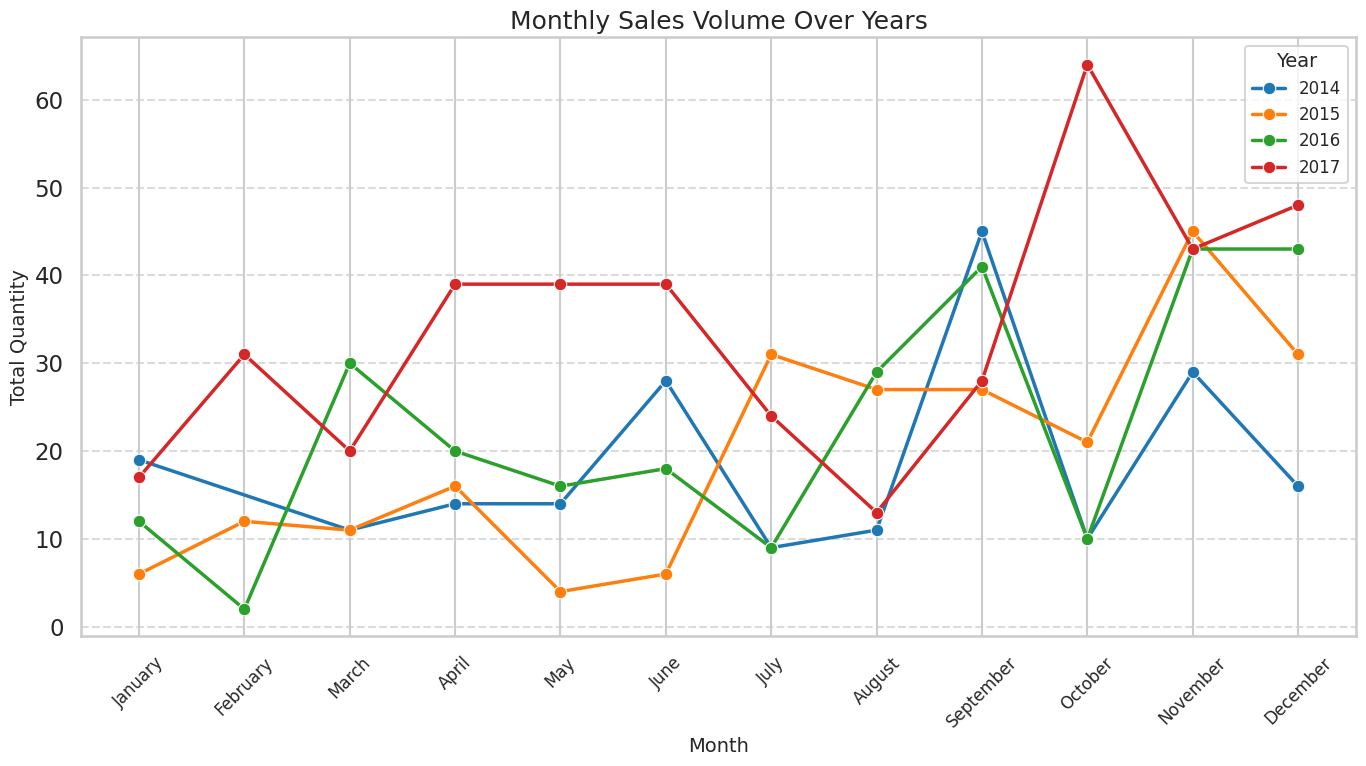

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn theme
sns.set_theme(style="whitegrid", context="talk", palette="Pastel2")

# Aggregate the volume (Quantity) by year and month
volume_table = df.groupby(['Order Year', 'Order Month'], observed=True).agg({
    'Quantity': 'sum'  # Sum up the quantity for each year-month combination
}).reset_index()

# Plot volume trends over years and months
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=volume_table,
    x='Order Month',
    y='Quantity',
    hue='Order Year',
    marker='o',
    linewidth=2.5,
    palette="tab10"
)

# Add labels, title, and format x-axis
plt.title("Monthly Sales Volume Over Years", fontsize=18)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Total Quantity", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title="Year", fontsize=12, title_fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()


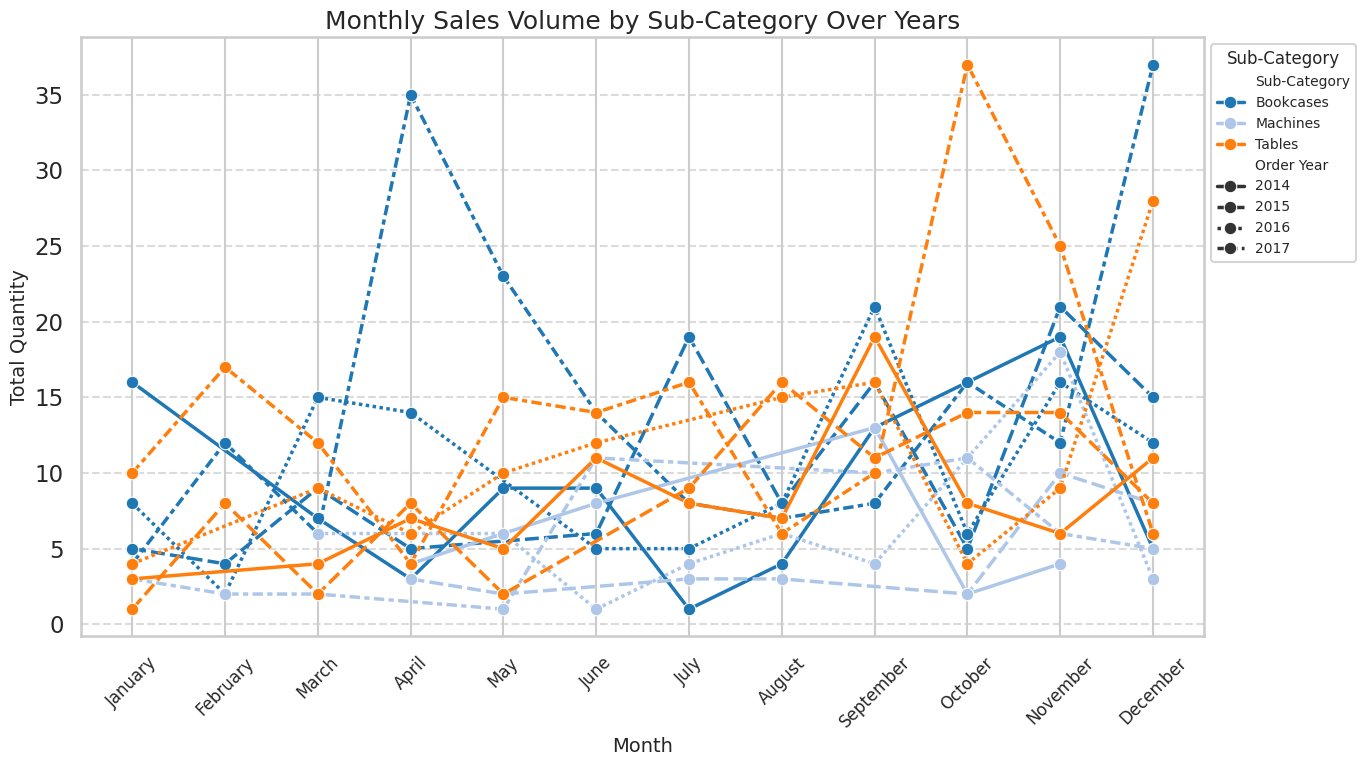

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn theme
sns.set_theme(style="whitegrid", context="talk", palette="Pastel2")

# Aggregate the volume (Quantity) by year, month, and sub-category
volume_table_by_subcategory = df.groupby(['Order Year', 'Order Month', 'Sub-Category'], observed=True).agg({
    'Quantity': 'sum'  # Sum up the quantity for each year-month-subcategory combination
}).reset_index()

# Plot volume trends over years and months by Sub-Category
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=volume_table_by_subcategory,
    x='Order Month',
    y='Quantity',
    hue='Sub-Category',
    style='Order Year',  # Different line styles for each year
    marker='o',
    linewidth=2.5,
    palette="tab20"
)

# Add labels, title, and format x-axis
plt.title("Monthly Sales Volume by Sub-Category Over Years", fontsize=18)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Total Quantity", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title="Sub-Category", fontsize=10, title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()


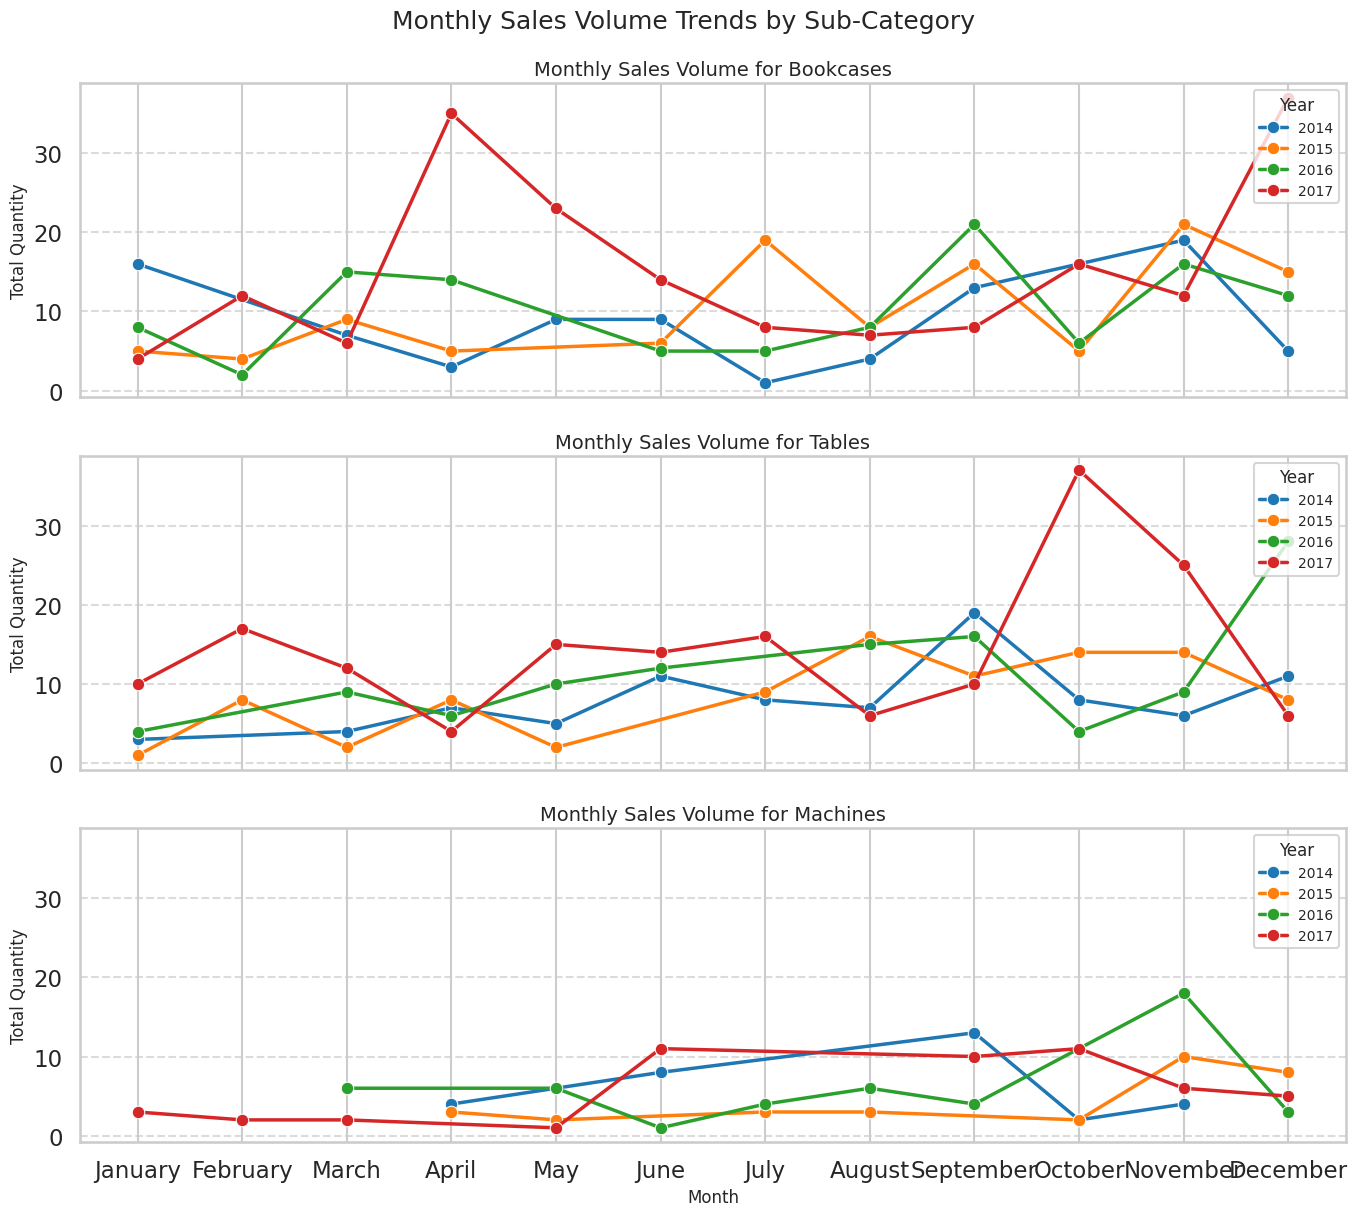

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn theme
sns.set_theme(style="whitegrid", context="talk", palette="Pastel2")

# Get unique sub-categories
subcategories = df['Sub-Category'].unique()

# Create a 3x1 grid of plots
fig, axes = plt.subplots(len(subcategories), 1, figsize=(14, len(subcategories) * 4), sharex=True, sharey=True)

# Plot for each sub-category
for ax, subcategory in zip(axes, subcategories):
    # Filter data for the current sub-category
    subcategory_data = df[df['Sub-Category'] == subcategory].groupby(['Order Year', 'Order Month'], observed=True).agg({
        'Quantity': 'sum'
    }).reset_index()

    # Plot lineplot for the current sub-category
    sns.lineplot(
        data=subcategory_data,
        x='Order Month',
        y='Quantity',
        hue='Order Year',
        marker='o',
        linewidth=2.5,
        palette="tab10",
        ax=ax
    )

    # Format the current subplot
    ax.set_title(f"Monthly Sales Volume for {subcategory}", fontsize=14)
    ax.set_xlabel("Month", fontsize=12)
    ax.set_ylabel("Total Quantity", fontsize=12)
    ax.legend(title="Year", fontsize=10, title_fontsize=12, loc='upper right')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.suptitle("Monthly Sales Volume Trends by Sub-Category", fontsize=18, y=1.02)
plt.show()


## Data Prep Utils Script

In [ ]:
script_content=r'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def remove_outliers_tukey(data, column, plot=True):
    """
    Removes outliers from a specified column in the dataset using Tukey's Fences (IQR Method),
    and optionally plots the data before and after outlier removal.

    Parameters:
    - data (DataFrame): The input dataset.
    - column (str): The column on which to perform outlier detection.
    - plot (bool): Whether to plot boxplots for the original and filtered data.

    Returns:
    - filtered_data (DataFrame): Dataset without outliers.
    - outliers (DataFrame): Outlier data points.
    """
    # Compute Q1, Q3, and IQR
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define fences
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    # Filter data
    filtered_data = data[(data[column] >= lower_fence) & (data[column] <= upper_fence)].copy()
    outliers = data[(data[column] < lower_fence) | (data[column] > upper_fence)].copy()

    # Print summary
    print(f"Column: {column}")
    print(f"Original Dataset: {len(data)} rows")
    print(f"Non-Outliers: {len(filtered_data)} rows ({len(filtered_data) / len(data) * 100:.2f}%)")
    print(f"Outliers: {len(outliers)} rows ({len(outliers) / len(data) * 100:.2f}%)")

    # Plotting
    if plot:
        sns.set_theme(style="whitegrid", context="notebook")

        # Boxplot for original data
        plt.figure(figsize=(8, 3))
        sns.boxplot(x=data[column], color='skyblue')
        plt.title(f"Original {column} Distribution (With Outliers)", fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.tight_layout()
        plt.show()

        # Boxplot for filtered data
        plt.figure(figsize=(8, 3))
        sns.boxplot(x=filtered_data[column], color='lightgreen')
        plt.title(f"Filtered {column} Distribution (Without Outliers)", fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.tight_layout()
        plt.show()

    return filtered_data, outliers



def preprocess_data(data):
    """
    Prepares and preprocesses the Superstore dataset by cleaning and deriving metrics.
    """
    # Ensure the order and ship date columns are in datetime format
    data['Order Date'] = pd.to_datetime(data['Order Date'])
    data['Ship Date'] = pd.to_datetime(data['Ship Date'])

    # Derived Metrics
    data['Profit Margin'] = (data['Profit'] / data['Sales']) * 100
    data['Shipping Time (Days)'] = (data['Ship Date'] - data['Order Date']).dt.days
    data['Estimated Cost'] = data['Sales'] - data['Profit']
    data['Profitability Ratio'] = (data['Profit'] / data['Estimated Cost']) * 100
    data['Effective Price'] = data['Sales'] * (1 - data['Discount'])

    customer_metrics = data.groupby('Customer ID').agg({
        'Sales': 'sum',
        'Profit': 'sum',
        'Order ID': 'nunique'  # Number of orders
    }).rename(columns={'Order ID': 'Order Count'})
    data = data.merge(customer_metrics, on='Customer ID', suffixes=('', '_Customer'))
    data['AOV'] = data['Sales_Customer'] / data['Order Count']

    region_sales = data.groupby('Region')['Sales'].sum()
    data['Regional Market Share (%)'] = (data['Region'].map(region_sales) / data['Sales'].sum()) * 100

    category_profit = data.groupby('Category')['Profit'].sum()
    subcategory_profit = data.groupby('Sub-Category')['Profit'].sum()
    data['Profit per Category'] = data['Category'].map(category_profit)
    data['Profit per Sub-Category'] = data['Sub-Category'].map(subcategory_profit)

    # Standardize specific columns (optional step)
    data['Shipping Time (Days)'] = data['Shipping Time (Days)'].astype(str).str.title()

    return data



def convert_to_category_and_visualize(data, threshold=25, exclude_columns=None):
    """
    Converts columns with fewer than 'threshold' unique values to 'category' dtype,
    excluding specified columns, and visualizes the unique value counts.
    """
    if exclude_columns is None:
        exclude_columns = []

    # Count unique values for each column
    unique_counts = data.nunique()

    # Identify columns to convert, excluding specified columns
    columns_to_convert = [
        col for col in unique_counts[unique_counts < threshold].index
        if col not in exclude_columns
    ]

    # Convert selected columns to 'category' dtype
    for column in columns_to_convert:
        data[column] = data[column].astype('category')

    # Filter for columns with fewer than threshold unique values for visualization
    filtered_counts = unique_counts[
        (unique_counts < threshold) & (~unique_counts.index.isin(exclude_columns))
    ]

    # Visualize unique value counts
    palette = sns.color_palette("Pastel2", len(filtered_counts))
    plt.figure(figsize=(9, 5))
    filtered_counts.sort_values(ascending=False).plot(
        kind='bar',
        color=palette,
        edgecolor='black'
    )
    plt.title('Unique Value Counts for Columns Converted to Category', fontsize=14)
    plt.xlabel('Columns', fontsize=12)
    plt.ylabel('Number of Unique Categories', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Verify the conversions
    # print("\nColumns converted to 'category' dtype:")
    # for column in columns_to_convert:
    #     print(f"{column}: {data[column].dtype}")

    return data

def add_time_based_columns(data):
    """
    Adds time-based columns derived from Order Date and Ship Date to the dataset,
    and converts these columns to categorical type for analysis and visualization.
    Retains numeric month columns for reference.
    """
    # Ensure the order and ship date columns are in datetime format
    data['Order Date'] = pd.to_datetime(data['Order Date'])
    data['Ship Date'] = pd.to_datetime(data['Ship Date'])

    # Create new time-based columns
    data['Order Year'] = data['Order Date'].dt.year
    data['Order Month Numeric'] = data['Order Date'].dt.month
    data['Order Day'] = data['Order Date'].dt.day
    data['Order Weekday'] = data['Order Date'].dt.day_name()  # e.g., 'Monday', 'Tuesday'

    data['Ship Year'] = data['Ship Date'].dt.year
    data['Ship Month Numeric'] = data['Ship Date'].dt.month
    data['Ship Day'] = data['Ship Date'].dt.day
    data['Ship Weekday'] = data['Ship Date'].dt.day_name()

    # Convert numeric months to month names
    month_names = [
        "January", "February", "March", "April", "May", "June",
        "July", "August", "September", "October", "November", "December"
    ]
    data['Order Month'] = data['Order Month Numeric'].apply(lambda x: month_names[x - 1])
    data['Ship Month'] = data['Ship Month Numeric'].apply(lambda x: month_names[x - 1])

    # Ensure month columns are ordered categorical variables
    month_categories = pd.CategoricalDtype(categories=month_names, ordered=True)
    data['Order Month'] = data['Order Month'].astype(month_categories)
    data['Ship Month'] = data['Ship Month'].astype(month_categories)

    # Convert year columns to categorical
    data['Order Year'] = data['Order Year'].astype('category')
    data['Ship Year'] = data['Ship Year'].astype('category')

    # Convert other time-based columns to categorical
    time_columns = ['Order Day', 'Order Weekday', 'Ship Day', 'Ship Weekday']
    for column in time_columns:
        data[column] = data[column].astype('category')

    return data

def order_categorical_columns(data):
    """
    Assigns a specific order to key categorical columns for proper visualization and analysis.

    Args:
        data (pd.DataFrame): The dataset.

    Returns:
        pd.DataFrame: The updated dataset with ordered categorical columns.
    """
    # Define the specific order for weekdays
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    # Define the specific order for months
    month_order = [
        "January", "February", "March", "April", "May", "June",
        "July", "August", "September", "October", "November", "December"
    ]

    # Assign weekday order if the column exists
    if 'Order Weekday' in data.columns:
        data['Order Weekday'] = pd.Categorical(
            data['Order Weekday'],
            categories=weekday_order,
            ordered=True
        )

    # Assign month order if the column exists
    if 'Order Month' in data.columns:
        data['Order Month'] = pd.Categorical(
            data['Order Month'],
            categories=month_order,
            ordered=True
        )

    # Assign abbreviated month order if the column exists
    if 'Order Month Abbrev' in data.columns:
        abbrev_month_order = [
            "Jan", "Feb", "Mar", "Apr", "May", "Jun",
            "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
        ]
        data['Order Month Abbrev'] = pd.Categorical(
            data['Order Month Abbrev'],
            categories=abbrev_month_order,
            ordered=True
        )

    return data

def add_abbreviated_columns(data):
    """
    Adds abbreviated versions of 'Order Month' and 'Order Weekday' columns to the dataset,
    ensures they are stored as categorical types with the correct order.

    Args:
        data (pd.DataFrame): The dataset with ordered 'Order Month' and 'Order Weekday'.

    Returns:
        pd.DataFrame: The dataset with new abbreviated columns.
    """
    # Define abbreviations for months and weekdays
    month_order = {
        "January": "Jan", "February": "Feb", "March": "Mar", "April": "Apr",
        "May": "May", "June": "Jun", "July": "Jul", "August": "Aug",
        "September": "Sep", "October": "Oct", "November": "Nov", "December": "Dec"
    }

    weekday_order = {
        "Monday": "Mon", "Tuesday": "Tue", "Wednesday": "Wed", "Thursday": "Thu",
        "Friday": "Fri", "Saturday": "Sat", "Sunday": "Sun"
    }

    # Map abbreviations to create new columns
    data['Order Month Abbrev'] = data['Order Month'].map(month_order)
    data['Order Weekday Abbrev'] = data['Order Weekday'].map(weekday_order)

    # Ensure the new columns are categorical with the correct order
    abbrev_month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    abbrev_weekday_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

    data['Order Month Abbrev'] = pd.Categorical(
        data['Order Month Abbrev'],
        categories=abbrev_month_order,
        ordered=True
    )

    data['Order Weekday Abbrev'] = pd.Categorical(
        data['Order Weekday Abbrev'],
        categories=abbrev_weekday_order,
        ordered=True
    )

    return data

def standardize_categorical_columns(data):
    """
    Standardizes all categorical columns by converting their values to title case.
    Ensures consistent formatting across categorical data.
    """
    # Select all categorical columns
    categorical_columns = data.select_dtypes(include='category').columns

    # Apply title case to each categorical column
    for column in categorical_columns:
        if data[column].dtype.name == 'category':  # Ensure it's a category column
            # Convert to string, apply title case, and convert back to category
            data[column] = data[column].astype(str).str.title().astype('category')

    # Verify changes
    print("Standardized Categorical Columns:")
    for column in categorical_columns:
        print(f"{column}: {data[column].unique()}")

    return data

def standardize_selected_categorical_columns(data, columns):
    """
    Standardizes specific categorical columns by converting their values to title case
    and ensures the columns remain as 'category' dtype.
    """
    for column in columns:
        if column in data.columns:
            # Convert to string, apply title case, and convert back to category
            data[column] = data[column].astype(str).str.title().astype('category')
    return data


def remove_duplicates(data):
    """
    Removes duplicate rows from the dataset and reports the number of rows removed.
    """
    initial_shape = data.shape
    data = data.drop_duplicates()
    print(f"Removed {initial_shape[0] - data.shape[0]} duplicate rows.")
    return data

def prepare_data(
    data,
    outlier_column=None,
    exclude_columns=None,
    columns_to_standardize=None,
    threshold=25
):
    """
    Combines all data preparation steps into a single function for streamlined processing.

    Args:
        data (pd.DataFrame): The input dataset.
        outlier_column (str, optional): Column to perform outlier detection on.
        exclude_columns (list, optional): Columns to exclude from category conversion.
        columns_to_standardize (list, optional): Specific categorical columns to standardize.
        threshold (int, optional): Unique value threshold for category conversion. Default is 25.

    Returns:
        pd.DataFrame: The cleaned and preprocessed dataset.
    """
    if exclude_columns is None:
        exclude_columns = [
            'Profit per Category', 'Profit per Sub-Category',
            'Regional Market Share (%)', 'Quantity', 'Order Count'
        ]

    if columns_to_standardize is None:
        columns_to_standardize = ['Region', 'Category', 'Sub-Category']

    if outlier_column:
        print(f"Step 0: Removing outliers from column '{outlier_column}'...\n")
        data, outliers = remove_outliers_tukey(data, column=outlier_column, plot=True)
        print(f"Outliers detected: {len(outliers)} rows sequestered for separate analysis.\n")

    print("Step 1: Preprocessing the data...")
    data = preprocess_data(data)

    print("Step 2: Adding time-based columns...")
    data = add_time_based_columns(data)

    print("Step 3: Converting to category and visualizing...\n")
    data = convert_to_category_and_visualize(data, threshold=threshold, exclude_columns=exclude_columns)

    print("\nStep 4: Removing duplicates...")
    data = remove_duplicates(data)

    print("Step 5: Standardizing selected categorical columns...\n")
    data = standardize_selected_categorical_columns(data, columns_to_standardize)

    print("Step 6: Ordering categorical columns...")
    data = order_categorical_columns(data)

    print("Step 7: Adding abbreviated columns...")
    data = add_abbreviated_columns(data)

    print("Data preparation completed!")
    return data


'''

with open("data_prep_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to data_prep_utils.py")

# Import and reload the module to use its functions
import importlib
import data_prep_utils as dpu
importlib.reload(dpu)

Script successfully written to data_prep_utils.py


<module 'data_prep_utils' from '/content/data_prep_utils.py'>

## Data Visualization Utils

In [ ]:
script_content=r'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def plot_sales_distribution(data, column='Sales', title='Sales Distribution Visualizations', color='lightgreen'):
    """
    Visualizes the distribution of a specified column with a barplot, boxplot, and histogram (with KDE).

    Args:
        data (pd.DataFrame): The dataset containing the sales data.
        column (str): The column to visualize. Default is 'Sales'.
        title (str): The title for the overall plot.
        color (str): The color for the visualizations. Default is 'lightgreen'.

    Returns:
        None: Displays the plots directly.
    """
    # Set Seaborn theme
    sns.set_theme(style="ticks", context="talk")

    # Create the figure and subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 6), gridspec_kw={'width_ratios': [1, 1, 2]})

    # Barplot: Total sales
    total_value = data[column].sum()
    sns.barplot(x=[column], y=[total_value], color=color, edgecolor='k', ax=axes[0])
    axes[0].set_title(f"Total {column} (Barplot)", fontsize=14)
    axes[0].set_xlabel("")
    axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

    # Boxplot: Distribution of sales
    sns.boxplot(y=data[column], color=color, showfliers=True, ax=axes[1], linecolor='k')
    axes[1].set_title(f"{column} Distribution (Boxplot)", fontsize=14)
    axes[1].set_xlabel(column)
    axes[1].set_ylabel("")

    # Histogram with KDE: Overall sales distribution
    sns.histplot(data=data, x=column, kde=True, color=color, ax=axes[2])
    axes[2].set_title(f"{column} Distribution (Histogram + KDE)", fontsize=14)
    axes[2].set_xlabel(column, fontsize=12)
    axes[2].set_ylabel("Frequency", fontsize=12)
    axes[2].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:,.0f}"))
    axes[2].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

    # Adjust layout
    plt.tight_layout()
    plt.suptitle(title, fontsize=20, y=1.03)
    plt.show()


def calculate_stats(data, column, **kwargs):
    """
    Calculate descriptive statistics for a given column and return selected metrics.

    Args:
        data (pd.DataFrame): The dataset.
        column (str): Column name for which to calculate statistics.
        kwargs: Keyword arguments specifying which statistics to calculate.

    Returns:
        dict: Dictionary of selected descriptive statistics.
    """
    stats = {}

    # Calculate all available statistics
    all_stats = {
        "min": data[column].min(),
        "median": data[column].median(),
        "mean": data[column].mean(),
        "mode": data[column].mode().iloc[0],  # First mode
        "std": data[column].std(),
        "max": data[column].max(),
        "range": data[column].max() - data[column].min()
    }

    # Filter based on kwargs or include all if no kwargs specified
    if not kwargs:
        stats = all_stats  # Return all stats if no specific arguments provided
    else:
        stats = {stat: all_stats[stat] for stat, include in kwargs.items() if include}

    return stats

def plot_descriptive_stats(stats, column_name, color_palette="Pastel2"):
    """
    Visualizes descriptive statistics as a horizontal barplot, with the column name in the title.

    Args:
        stats (dict): Dictionary of descriptive statistics where keys are statistic names and values are their numeric values.
        column_name (str): Name of the column the statistics represent (e.g., 'Sales', 'Profit').
        color_palette (str): Seaborn color palette for the bars. Default is "Pastel2".

    Returns:
        None: Displays the plot directly.
    """
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Convert stats dictionary to DataFrame
    stats_df = pd.DataFrame(stats.items(), columns=["Statistic", "Value"])

    # Create the horizontal barplot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=stats_df,
        y="Statistic",  # Use y-axis for categories
        x="Value",  # Use x-axis for values
        hue="Statistic", palette=color_palette,
        edgecolor="black"
    )

    # Add value annotations to each bar
    for index, row in stats_df.iterrows():
        ax.text(
            row["Value"] + 5,  # Slightly offset to the right of the bar
            index,  # Position at the center of the bar
            f"${row['Value']:,.2f}",  # Format with full value
            va="center",  # Center vertically
            ha="left",  # Align text to the left of the bar
            fontsize=12
        )

    # Add labels and title
    plt.title(f"Descriptive Statistics for {column_name}", fontsize=16)
    plt.xlabel("Value", fontsize=12)
    plt.ylabel("")
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))
    plt.tight_layout()
    plt.show()

'''

with open("data_visualization_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to data_visualization_utils.py")

# Import and reload the module to use its functions
import importlib
import data_visualization_utils as dvu
importlib.reload(dvu)

Script successfully written to data_visualization_utils.py


<module 'data_visualization_utils' from '/content/data_visualization_utils.py'>